# Evaluation Project 10

# Zomato Restaurant

📜 Note: Here we will be doing EDA with respect to both the target variables plotting graphs considering both target variables and at time of model testing and training we will do seperate analysis

In [1]:
# importing all libraries

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

from scipy.stats import skew, zscore
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


#classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


#regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# To display maximum rows and columns in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
# loading the dataset
df1=pd.read_csv('zomato.csv')
df1.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
df2= pd.read_excel('Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
# after merginft our final dataset 
df=pd.merge(df1,df2)
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


We can see from above data that we have 9551 rows and 22 columns.<br>
We have both numerical and categorical data.<br>


# Exploratory Data Analysis(EDA)

In [6]:
df.shape

(9551, 22)

We have 9551 rows and 22 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

We have no null values, counts of all columns are same.<br>
Float datatype column are 3<br>
Int datatype column are 5, <br>
object datatype columns are 14

# Checking Duplicates

In [8]:
df.duplicated().sum()

0

# Checking Null Values

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

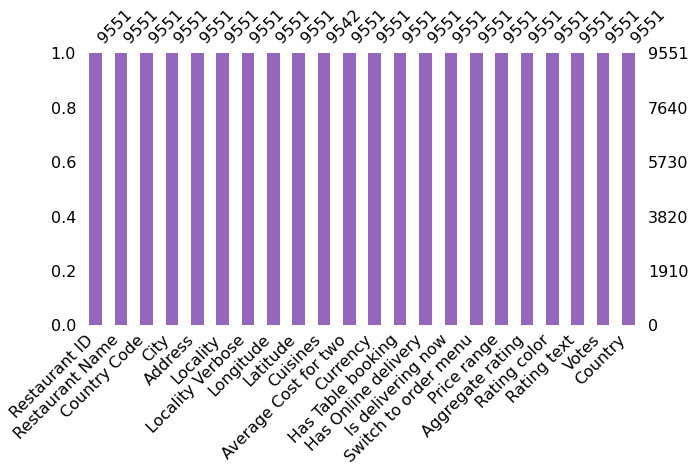

In [10]:
missingno.bar(df, figsize = (10,5), color="tab:purple")

From above plot we see missing values in cuisines

In [11]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace =True)

<AxesSubplot:>

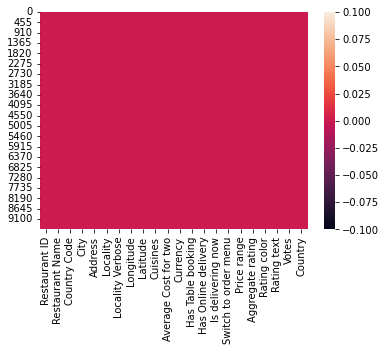

In [12]:
sns.heatmap(df.isnull())

All missing values are filled

# Checking Unique values

In [13]:
df.nunique().sort_values().to_frame('Count of Values')

,Count of Values
Switch to order menu,1
Is delivering now,2
Has Online delivery,2
Has Table booking,2
Price range,4
Rating text,6
Rating color,6
Currency,12
Country,15
Country Code,15


We can drop following columns as they have all unique values and no considerable significance in predicting both target varibles Avg cost for two  and Price range.<br>
Restaurant ID<br>
Restaurant Name<br>
Address<br>
Longitude<br>
Latitude<br>
Switch to order menu<br>


In [14]:
df.drop(['Latitude','Longitude','Address','Restaurant Name','Restaurant ID','Switch to order menu'], axis=1, inplace =True)

In [15]:
df.shape

(9551, 16)

# Checking Value Counts

In [16]:
# making a list of columns where count of unique values are upto triple digits
col =['Country Code', 'City','Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Country']  
for i in col:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
************************************************************************************************************************
City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
S��o Paulo                  20
Pune                        

KeyError: 'Switch to order menu'

In [17]:
# changing the bnormal symbols to meaning full values
df['City'].replace({'S��o Paulo': "São Paulo"}, inplace= True)
df['City'].replace({'Bras�_lia':"Brasília "}, inplace =True)
df['City'].replace({'��stanbul': 'Istanbul'}, inplace = True)
df['Currency'].replace({'Pounds(��)': 'Pounds(££)'}, inplace = True)

In [18]:
df['City'].value_counts()


New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
São Paulo                   20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jaipur  

In [19]:
df['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(££)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Code,9551.0,NaN,NaN,NaN,18.365616,56.750546,1.0,1.0,1.0,1.0,216.0
City,9551,141,New Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,9551,1208,Connaught Place,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuisines,9551,1825,North Indian,945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Cost for two,9551.0,NaN,NaN,NaN,1199.210763,16121.183073,0.0,250.0,400.0,700.0,800000.0
Currency,9551,12,Indian Rupees(Rs.),8652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Table booking,9551,2,No,8393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Online delivery,9551,2,No,7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is delivering now,9551,2,No,9517,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from above descriptive statistics we see count of all columns is same<br>
mean > median columns are: Country Code, Average Cost for two,Votes. These columns are right skewed<br>
median> mean columns are: Price range, Aggregate rating. These are left skewed <br>
We can also see presence of outliers

In [21]:
# getting list of object data type column names
obj_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_d.append(x)
print(f"Object Data Type Columns are: ", obj_d)


# getting the list of float data type column names
num_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64'  or df.dtypes[x] == 'int64':
        num_d.append(x)
print(f"Numerical Data Type Columns are: ", num_d)

Object Data Type Columns are:  ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']
Numerical Data Type Columns are:  ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


# Visulaization

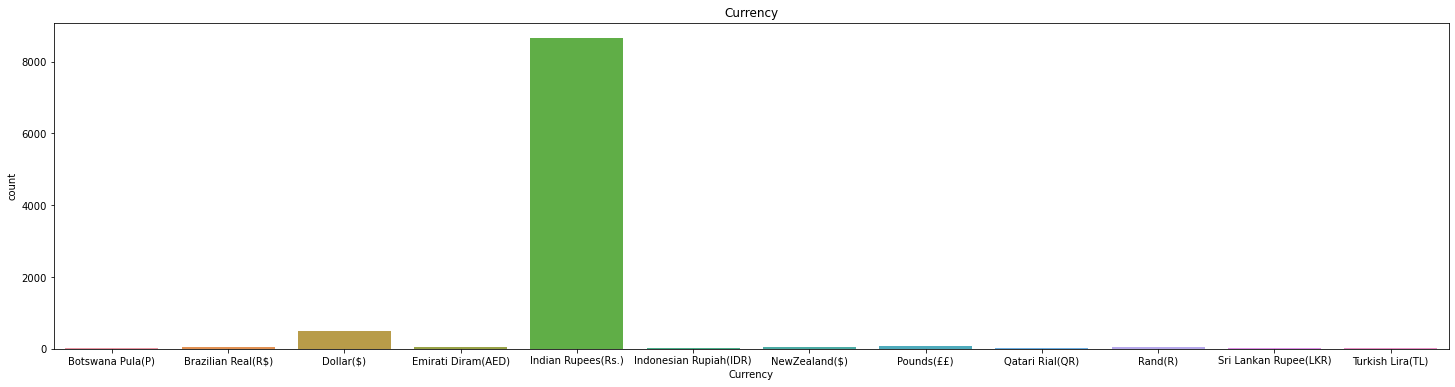

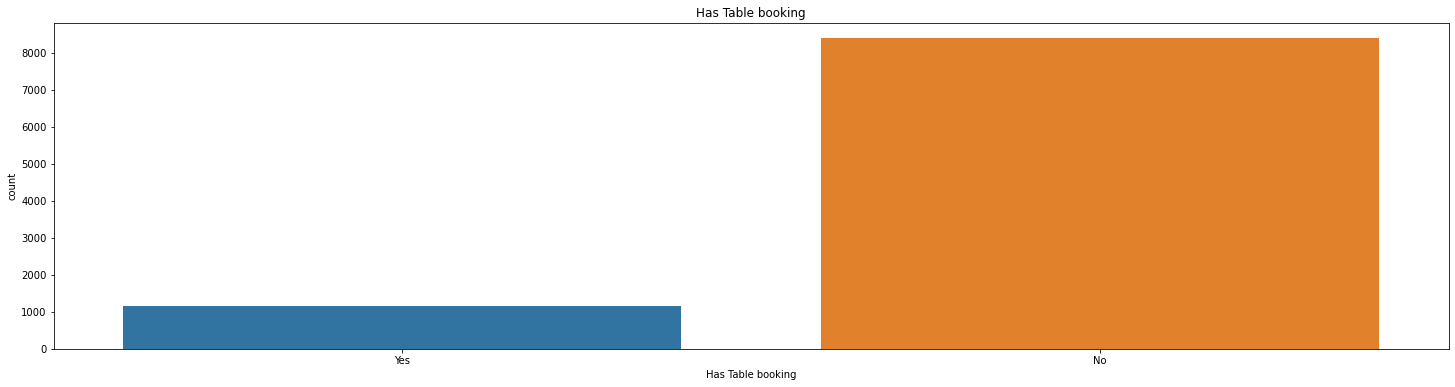

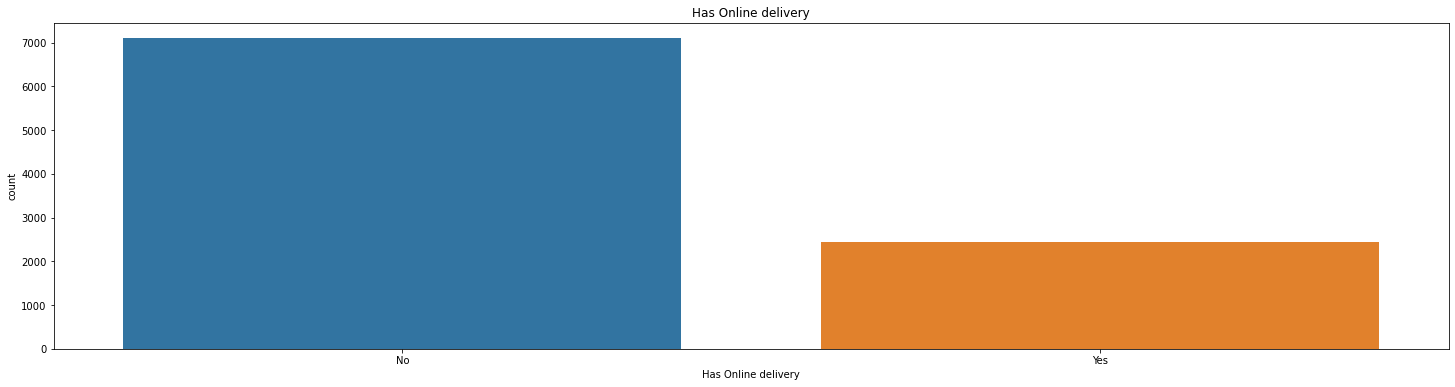

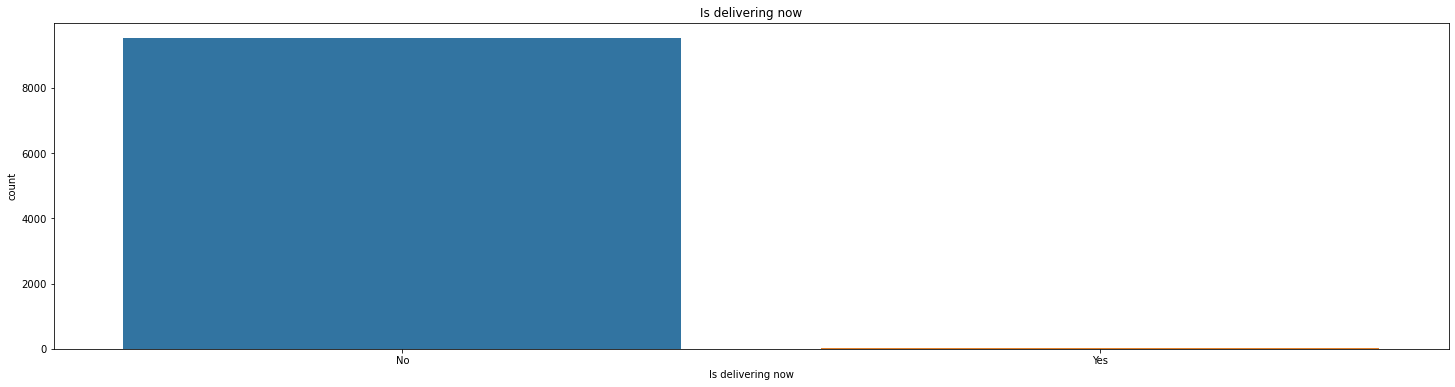

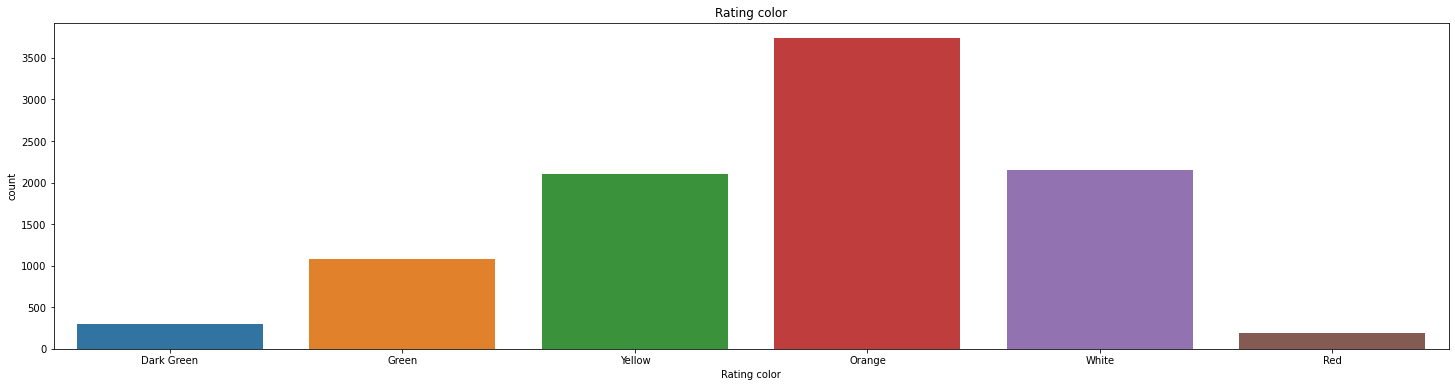

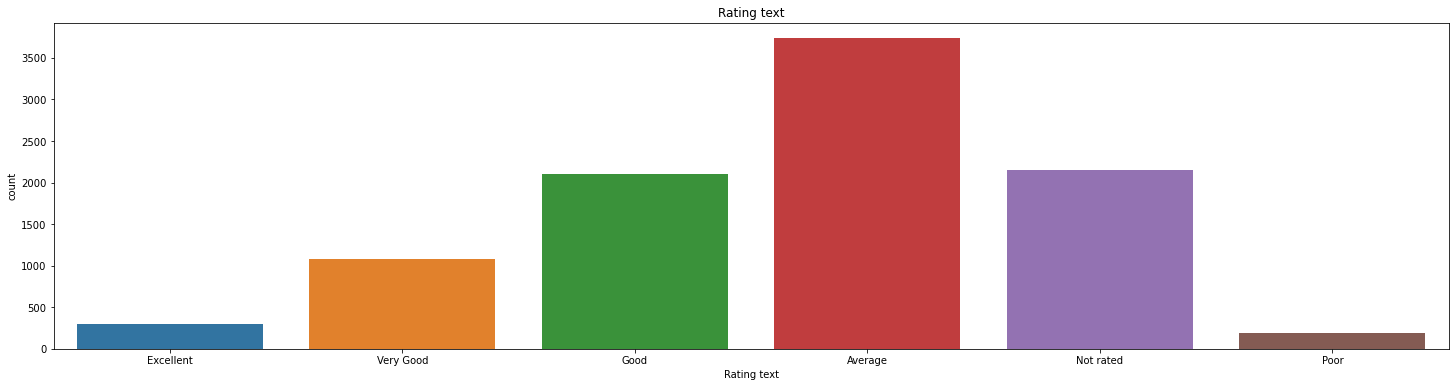

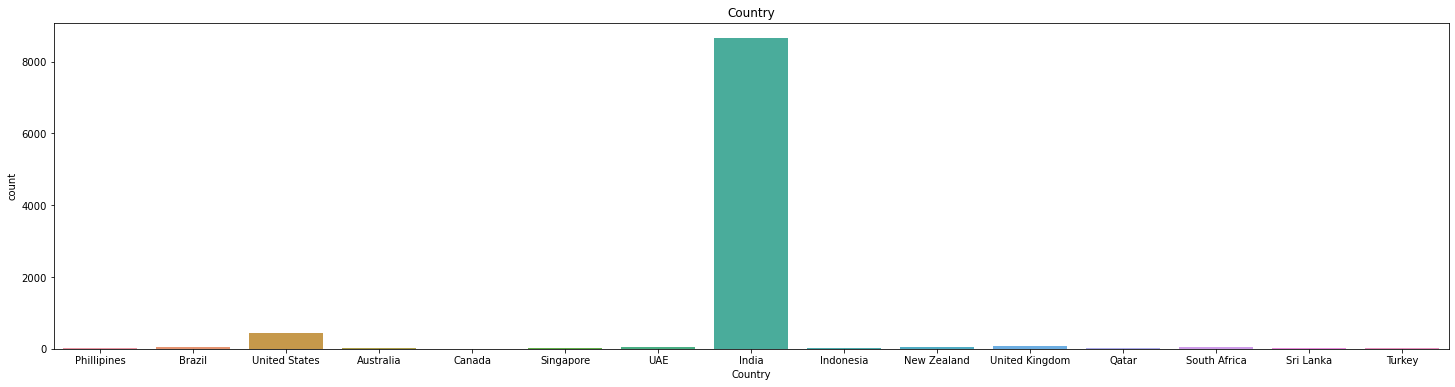

In [22]:
# plotting categorical data
list1 = ['Currency', 'Has Table booking', 'Has Online delivery', 
         'Is delivering now', 'Rating color', 'Rating text', 'Country']
for column in list1:
    if df[column].dtypes == object:
        plt.figure(figsize=(25,6))
        sns.countplot(df[column])
        plt.title(column)
        plt.show()
        
        


Observations:<br>
    
1.Indian currency is highest used among all.<br>
2.Most of times there is no table booking but there is online delivery.<br>
3.Most people has rated orange color.<br>
4.Most people have rated average.<br>
5.Indian people uses more Zomato food.<br>


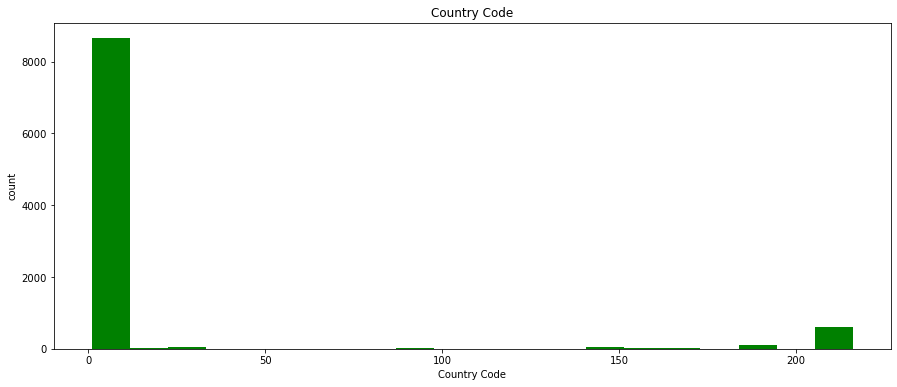

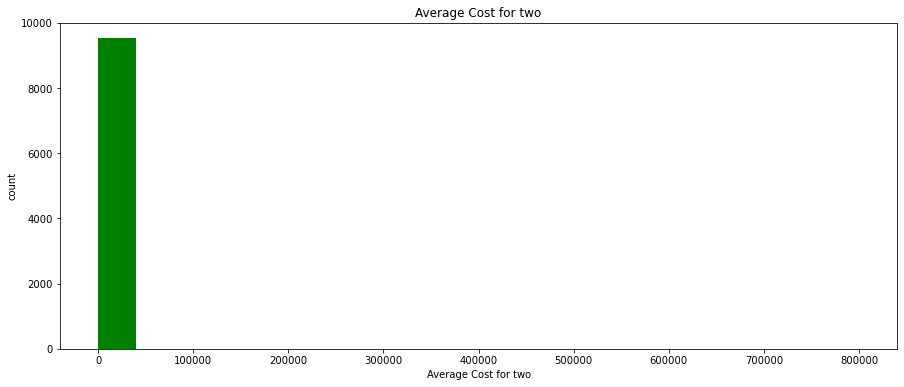

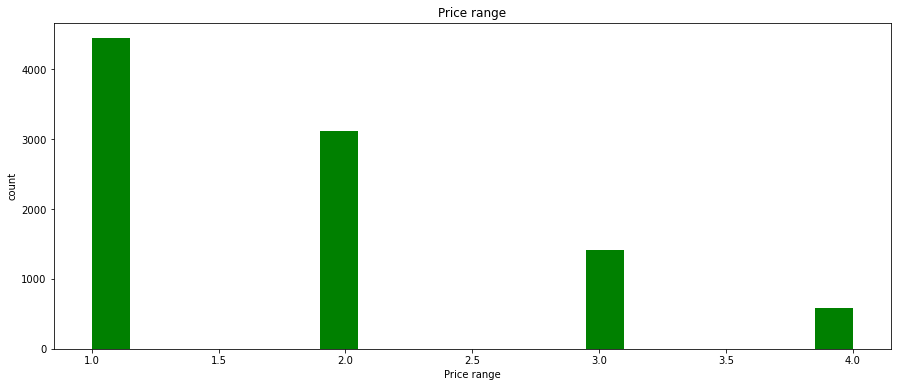

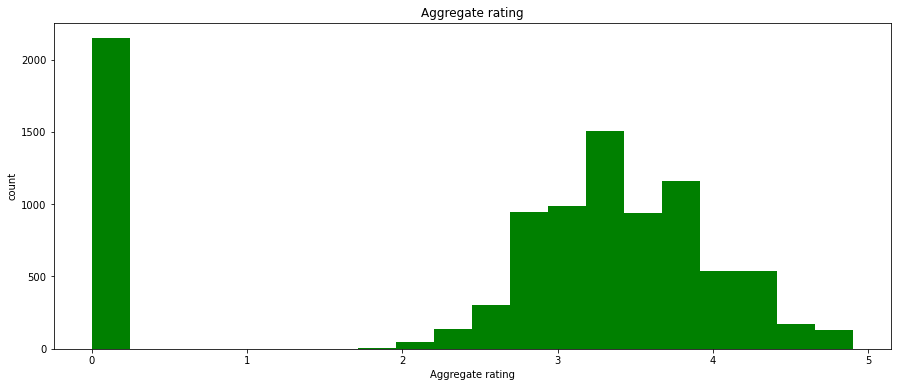

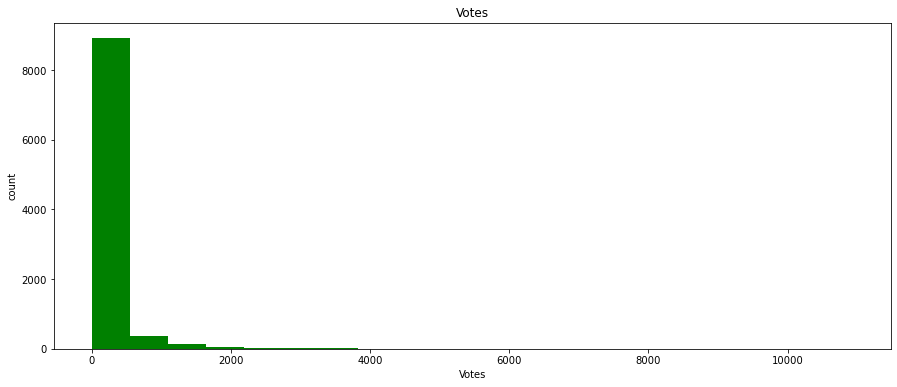

In [23]:
# plotting numerical data
for column in df.columns:
    if df[column].dtypes == 'float64' or df[column].dtypes == 'int64':
        plt.figure(figsize=(15,6))
        df[column].hist(bins=20, grid =False, color='green')
        plt.xlabel(column)
        plt.ylabel('count')
        plt.title(column)
        plt.show()
        

Observations:
1.Country code 0-50 is maximum.<br>
2.Avg cost for two ranges from 0-800000.<br>

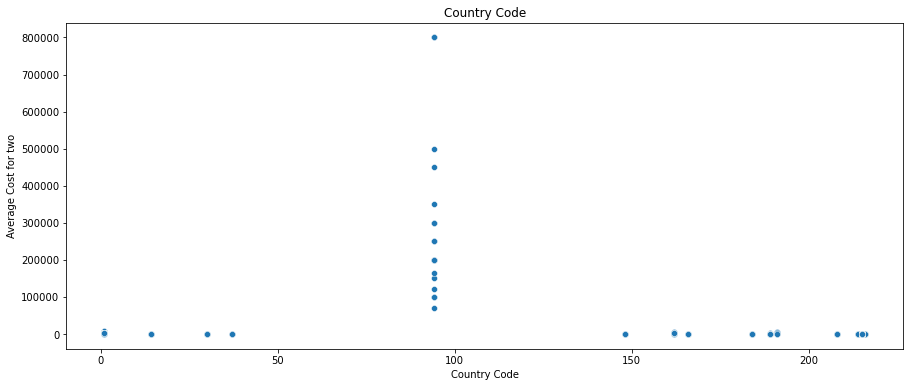

****************************************************************************************************


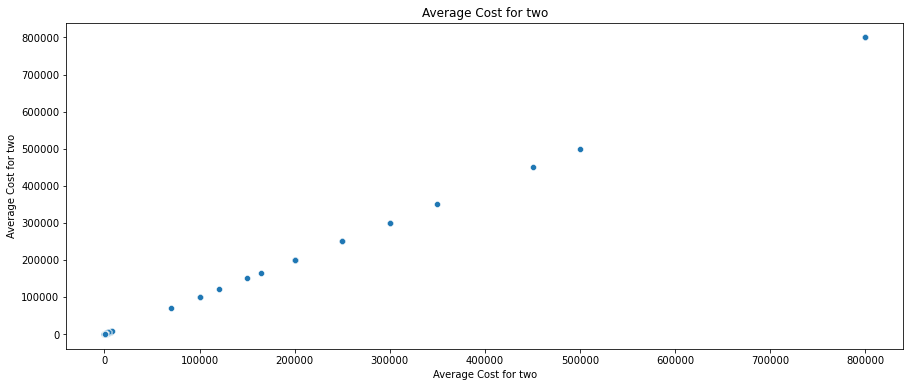

****************************************************************************************************


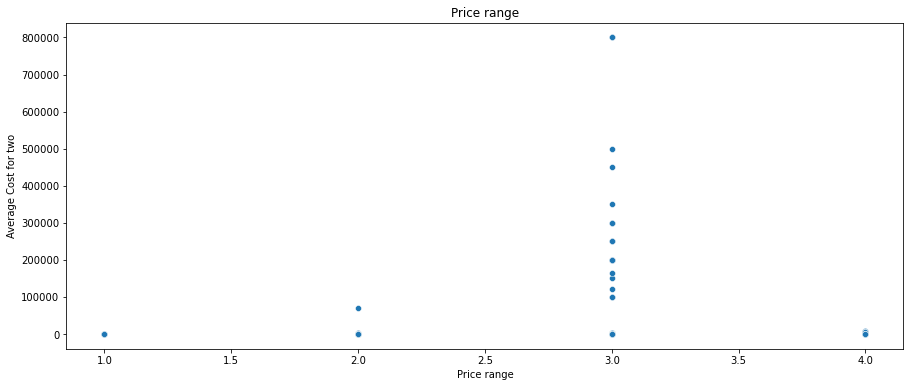

****************************************************************************************************


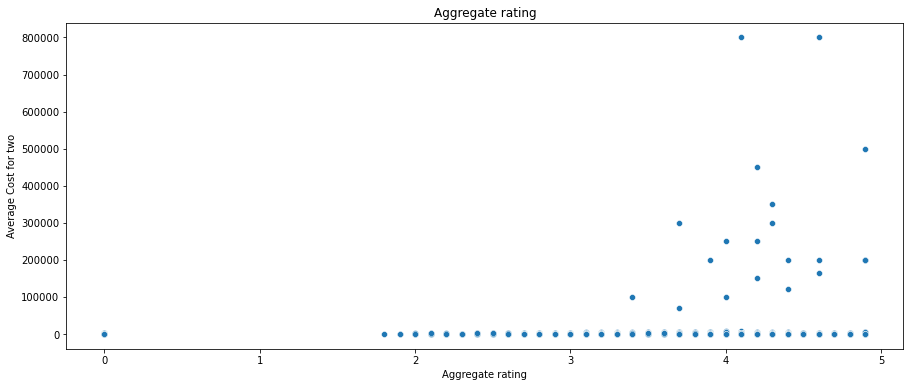

****************************************************************************************************


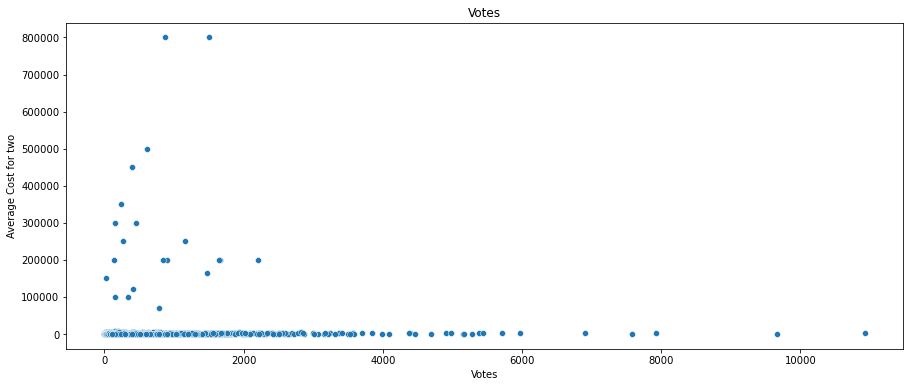

****************************************************************************************************


In [24]:
# plotting continuous feature variables versus regression target variable 'Average Cost for two'
for column in df.columns:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure(figsize=(15,6))
        sns.scatterplot(data= df,x= df[column], y= 'Average Cost for two')
        plt.xlabel(column)
        plt.ylabel('Average Cost for two')
        plt.title(column)
        plt.show()
        print('*'*100)

Observations:
1.For country code 94, avg cost for 2 is highest.<br>
2.avg cost for 2 highest for Pricerange 3.<br>
3.avg cost for 2 is highest when aggregate rating is higher.<br>
4.For votes less than 2000 avg cost is higher.<br>

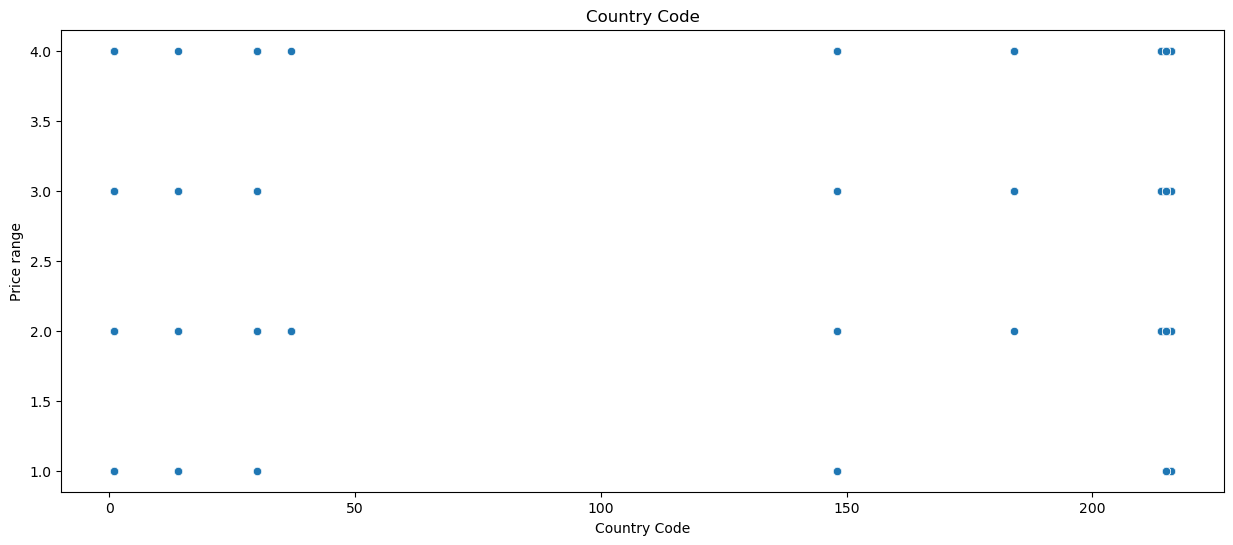

****************************************************************************************************


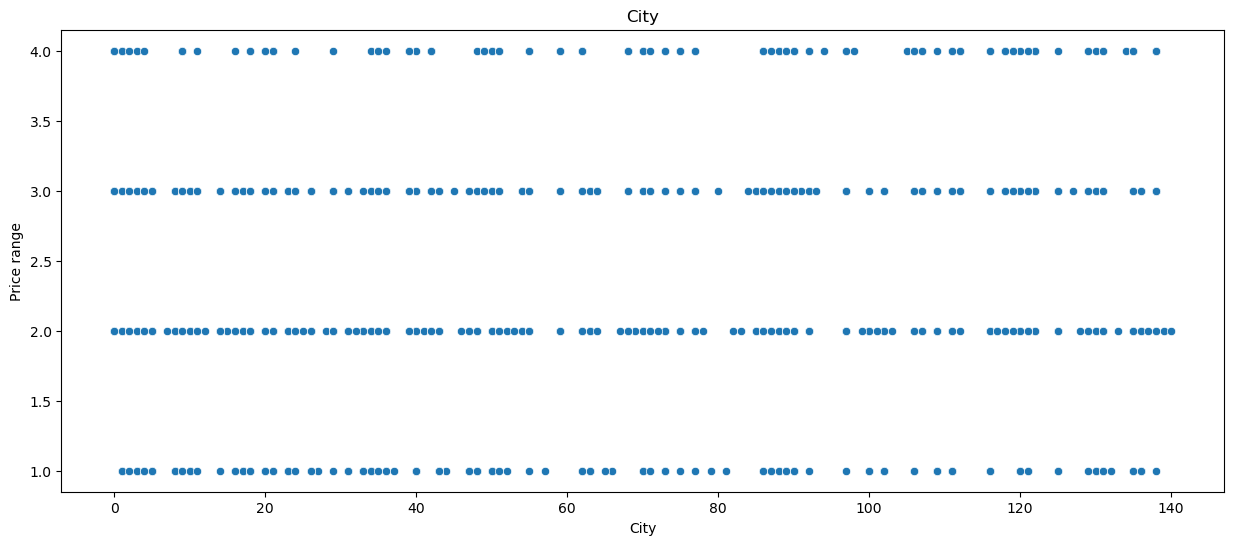

****************************************************************************************************


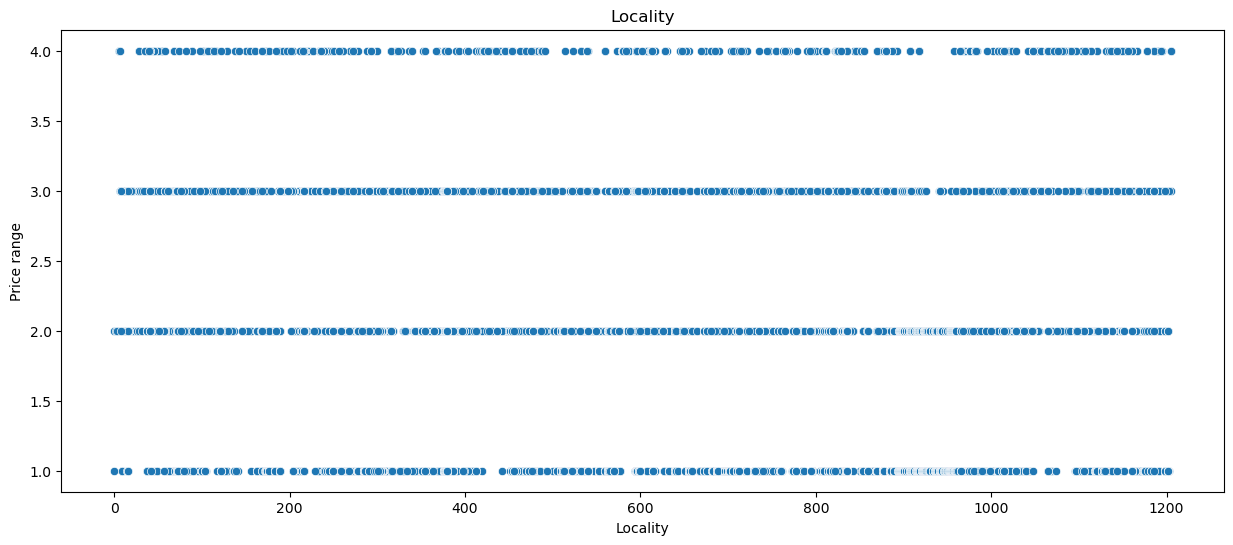

****************************************************************************************************


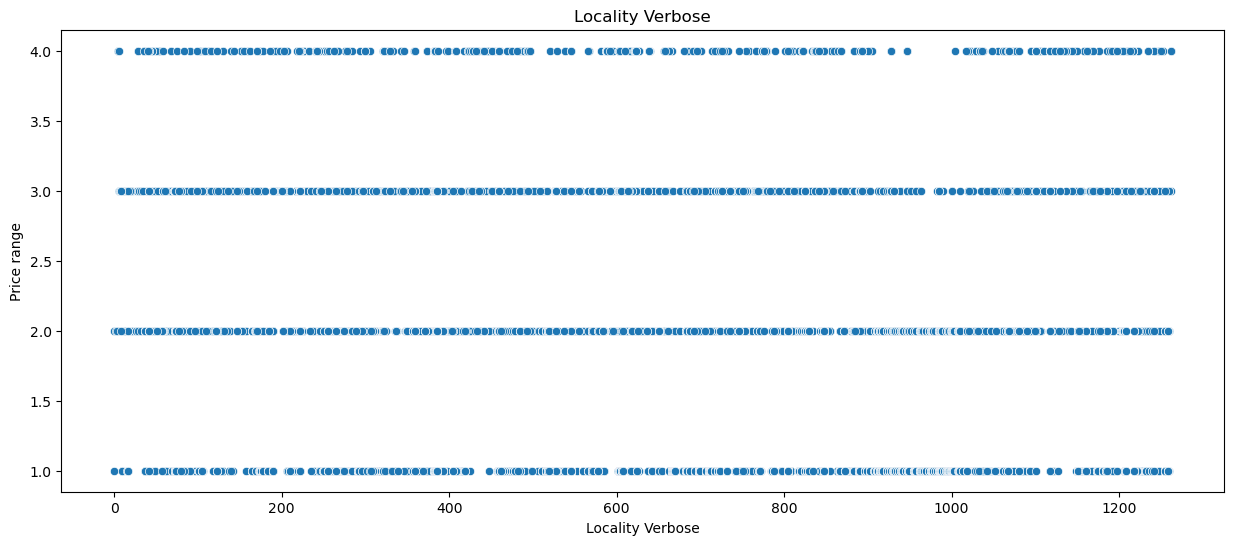

****************************************************************************************************


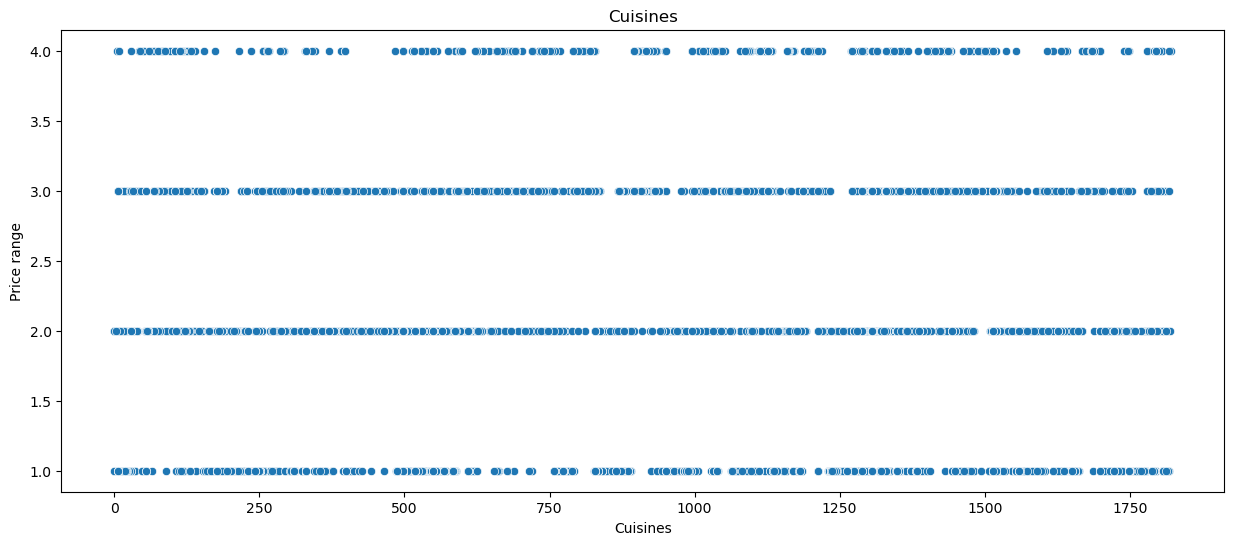

****************************************************************************************************


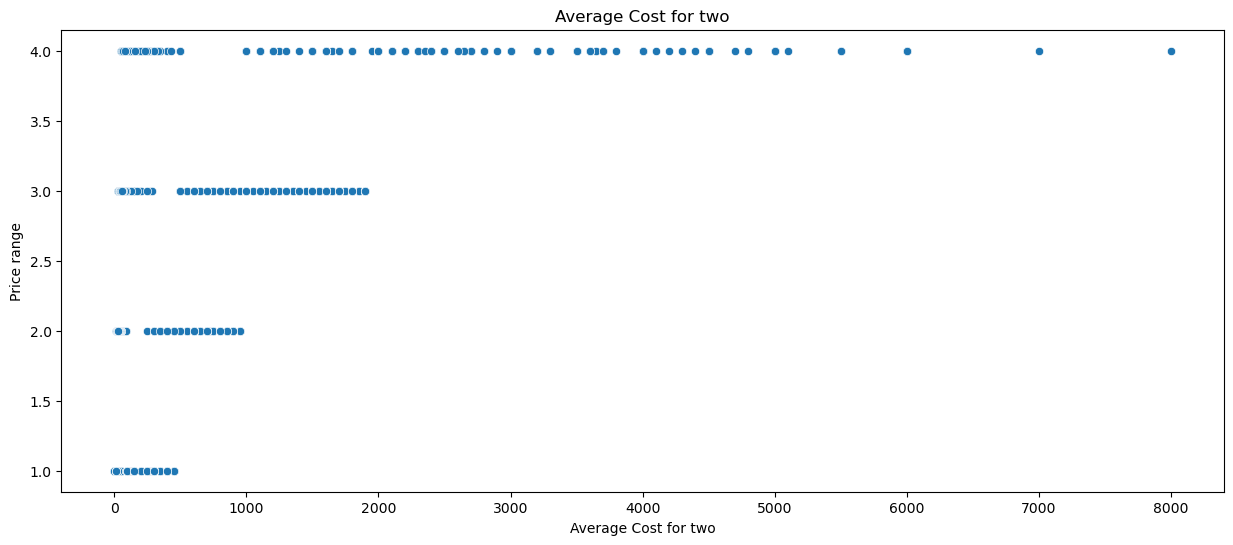

****************************************************************************************************


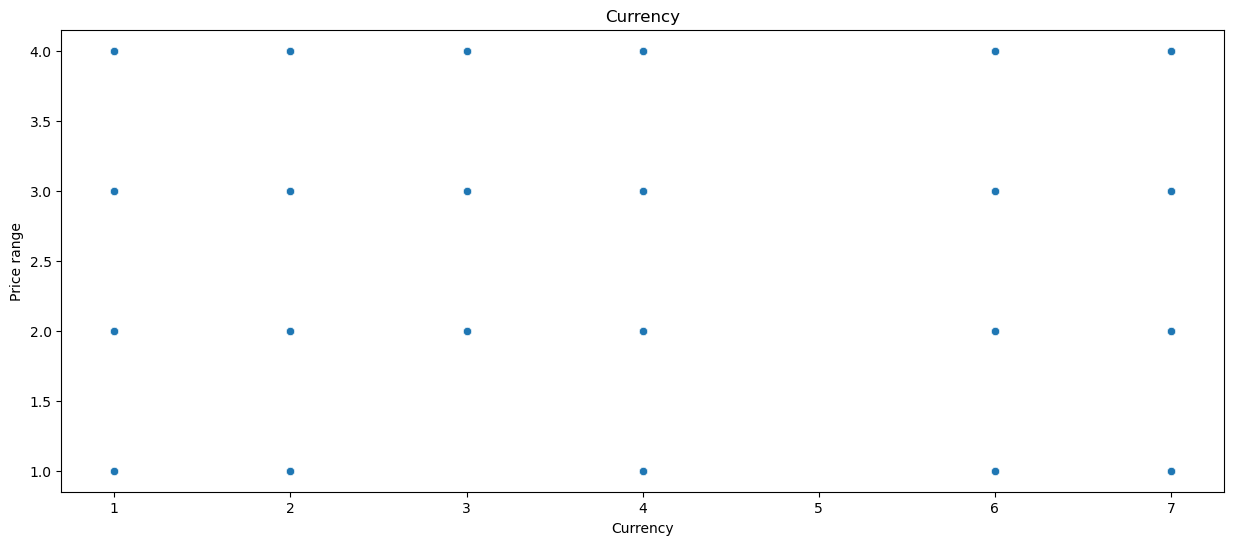

****************************************************************************************************


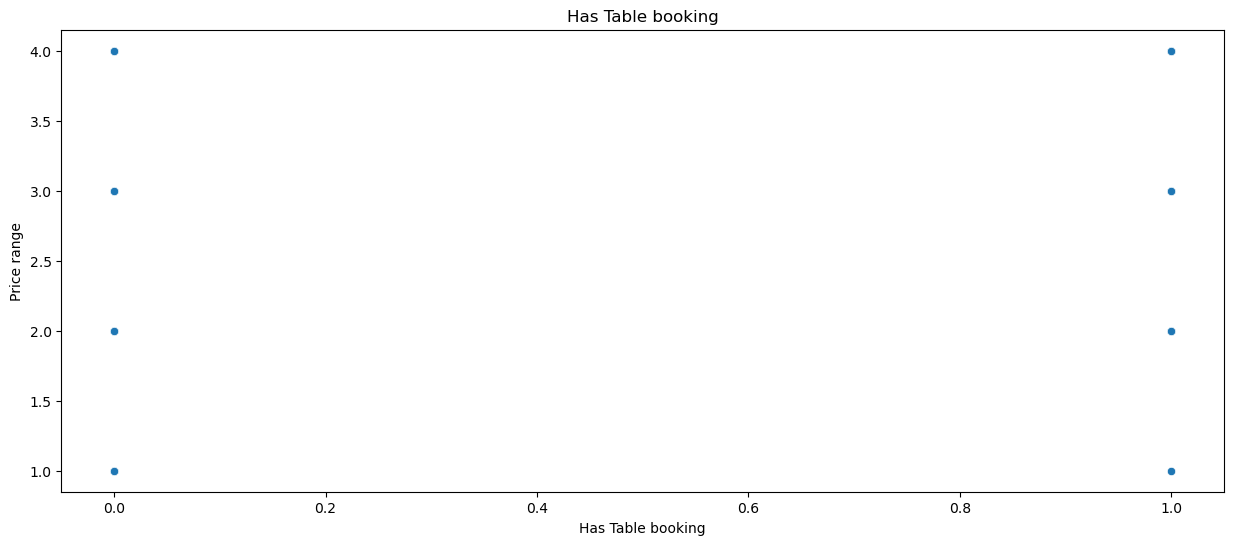

****************************************************************************************************


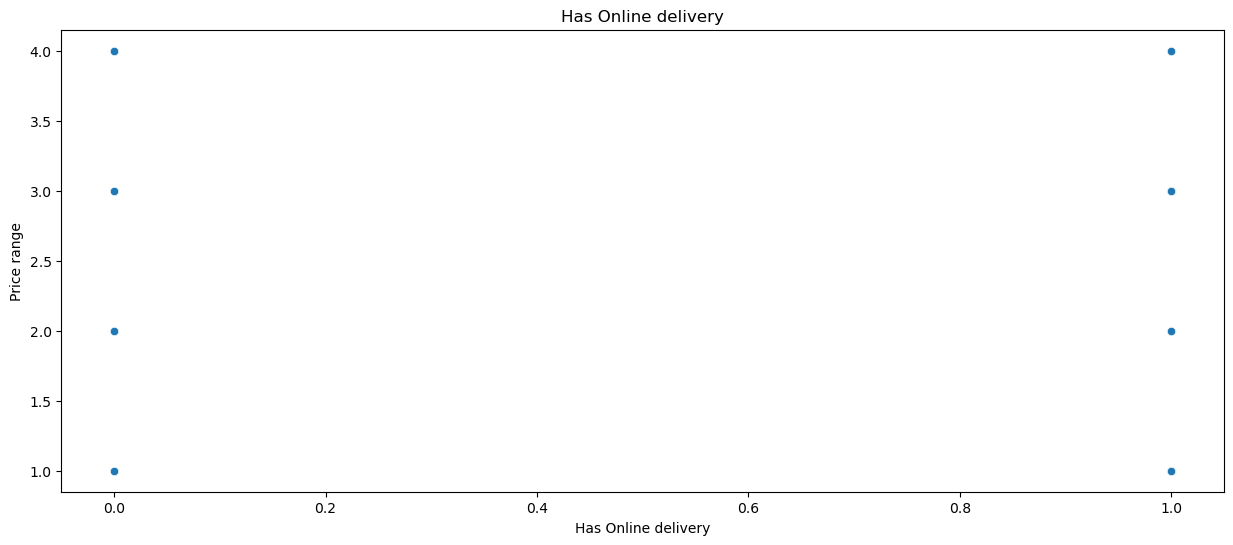

****************************************************************************************************


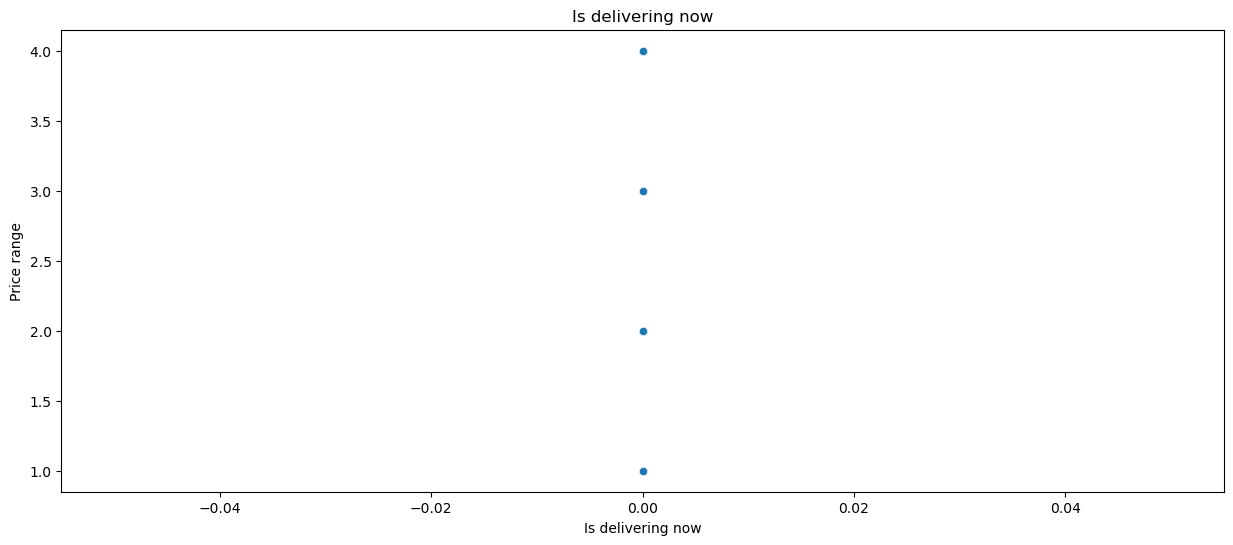

****************************************************************************************************


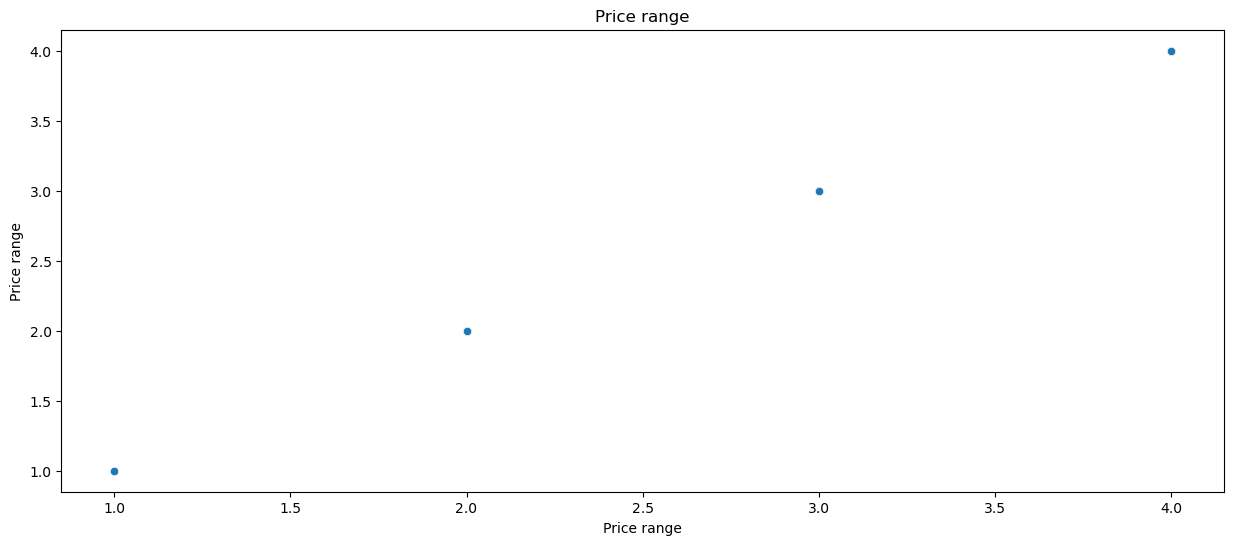

****************************************************************************************************


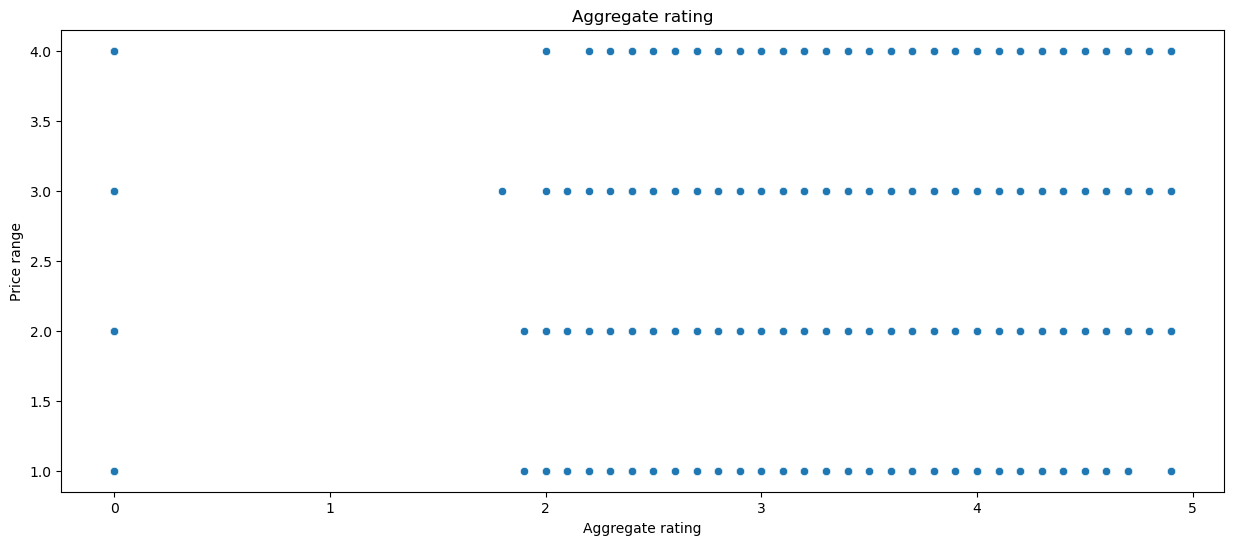

****************************************************************************************************


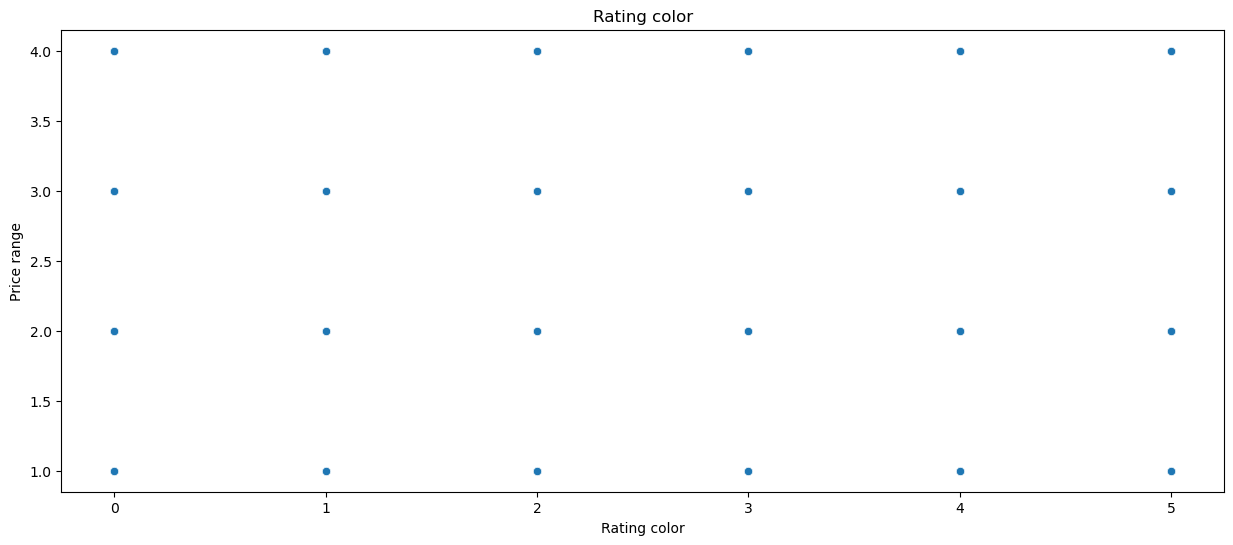

****************************************************************************************************


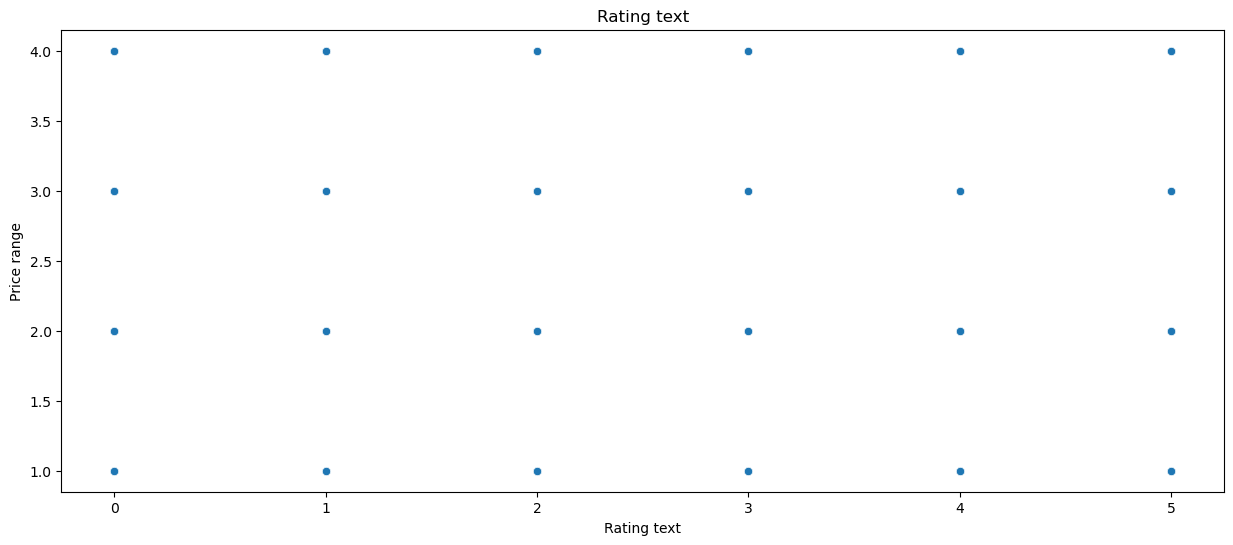

****************************************************************************************************


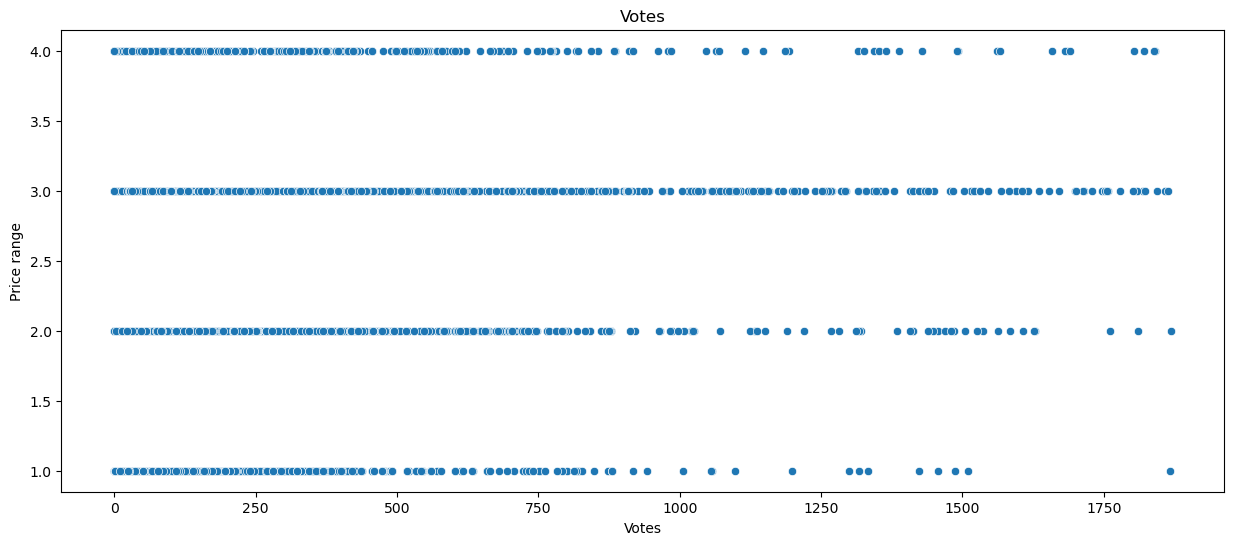

****************************************************************************************************


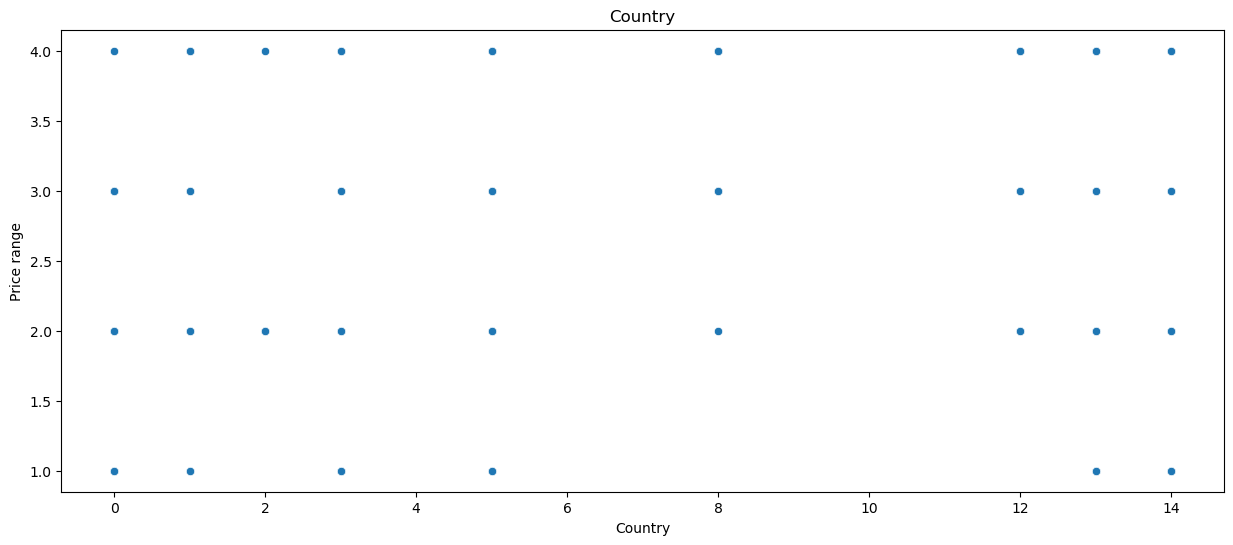

****************************************************************************************************


In [99]:
# plotting continuous feature variables versus classification target variable 'Price Range'
for column in df.columns:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure(figsize=(15,6))
        sns.scatterplot(data= df,x= df[column], y= 'Price range')
        plt.xlabel(column)
        plt.ylabel('Price range')
        plt.title(column)
        plt.show()
        print('*'*100)

In above plots we can see distribution of price range over all numerical data .

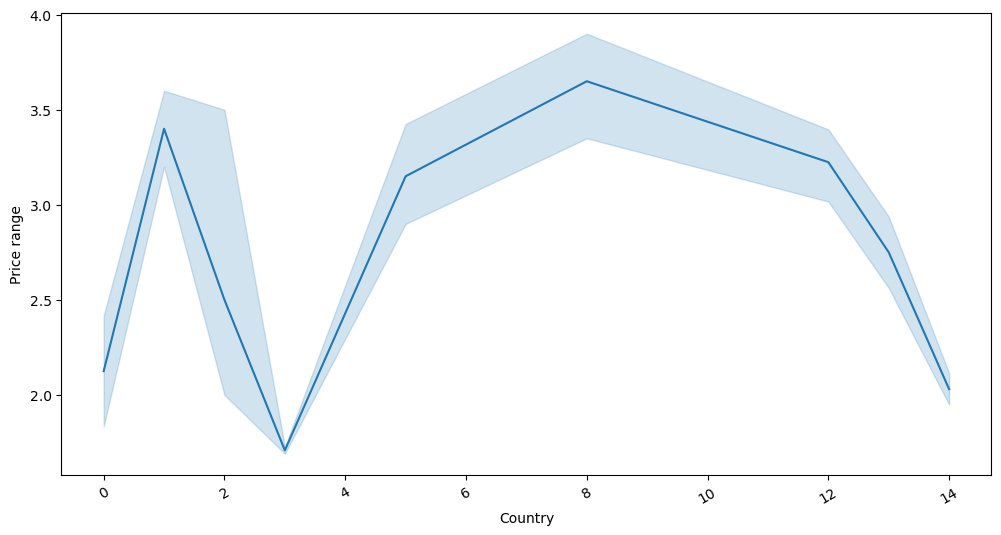

In [100]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Country",y='Price range',data=df)
plt.xticks(rotation=30)
plt.show()

Lowest price range is of India, whereas highest price range is of Singapore.

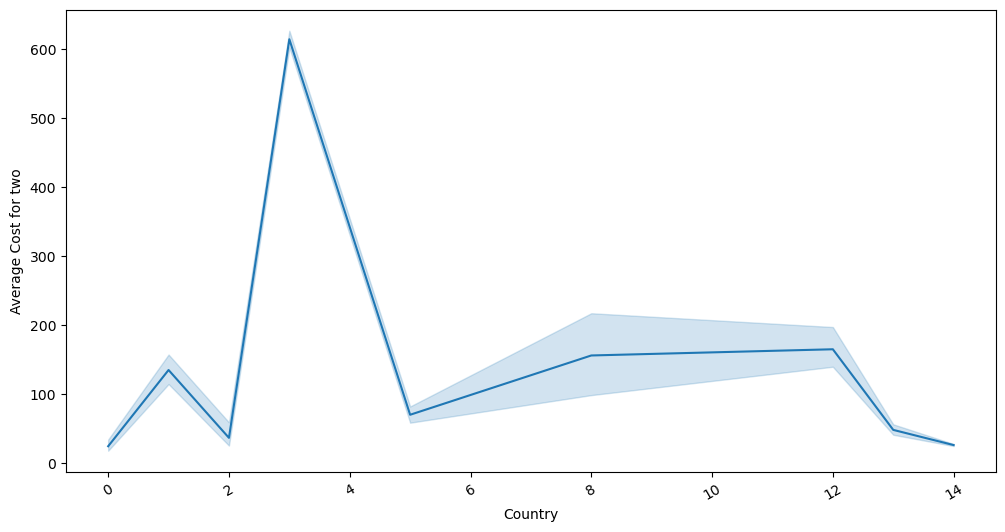

In [101]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Country",y='Average Cost for two',data=df, palette='g')
plt.xticks(rotation=30)
plt.show()

Average cost for two is highest in Indonesia

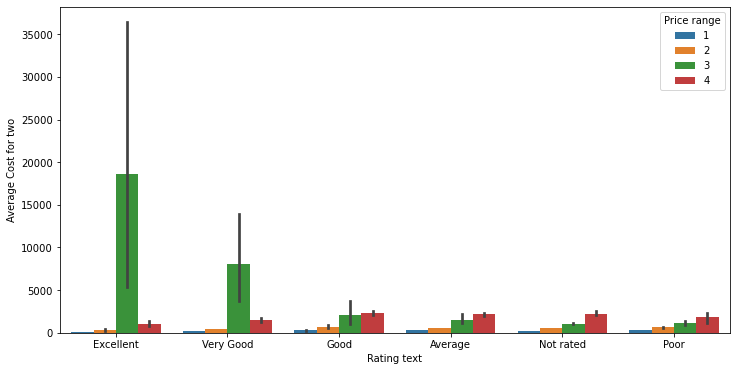

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Rating text'],y=df['Average Cost for two'],hue=df['Price range'])
plt.show()

The Average Cost for two seems to be correlated to the rating text, as restaurants with Excellent ratings seem to be on scale 3 of the price range and the average seems to be around the 17,000-18,000 mark

# Encoding the Data

In [27]:
# using ordinal encoder for categorical feature variable.
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, obj_d)
df.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,74.0,171.0,172.0,920.0,1100,0.0,1.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,162,74.0,593.0,601.0,1111.0,1200,0.0,1.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,162,76.0,308.0,314.0,1671.0,4000,0.0,1.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,162,76.0,862.0,875.0,1126.0,1500,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,162,76.0,862.0,875.0,1122.0,1500,0.0,1.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0


# Checking Correlation

In [28]:
df.corr()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.200695,-0.120076,-0.117543,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.200695,1.000000,0.100263,0.096943,0.026746,-0.027922,-0.111446,-0.001981,0.015779,-0.013969,-0.112941,-0.138622,0.117352,-0.103619,-0.087053,-0.196657
Locality,-0.120076,0.100263,1.000000,0.999465,0.006993,-0.012136,0.023718,-0.065594,-0.030993,-0.007299,-0.114457,-0.174336,0.036832,-0.036969,-0.123569,-0.118786
Locality Verbose,-0.117543,0.096943,0.999465,1.000000,0.005961,-0.011852,0.022960,-0.065132,-0.031766,-0.007353,-0.112311,-0.173253,0.037104,-0.035430,-0.122877,-0.116408
Cuisines,-0.132902,0.026746,0.006993,0.005961,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average Cost for two,0.043225,-0.027922,-0.012136,-0.011852,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.033466,-0.111446,0.023718,0.022960,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.061682,-0.001981,-0.065594,-0.065132,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076
Has Online delivery,-0.154605,0.015779,-0.030993,-0.031766,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303,-0.140464
Is delivering now,-0.018291,-0.013969,-0.007299,-0.007353,0.007773,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,-0.001124,-0.016607


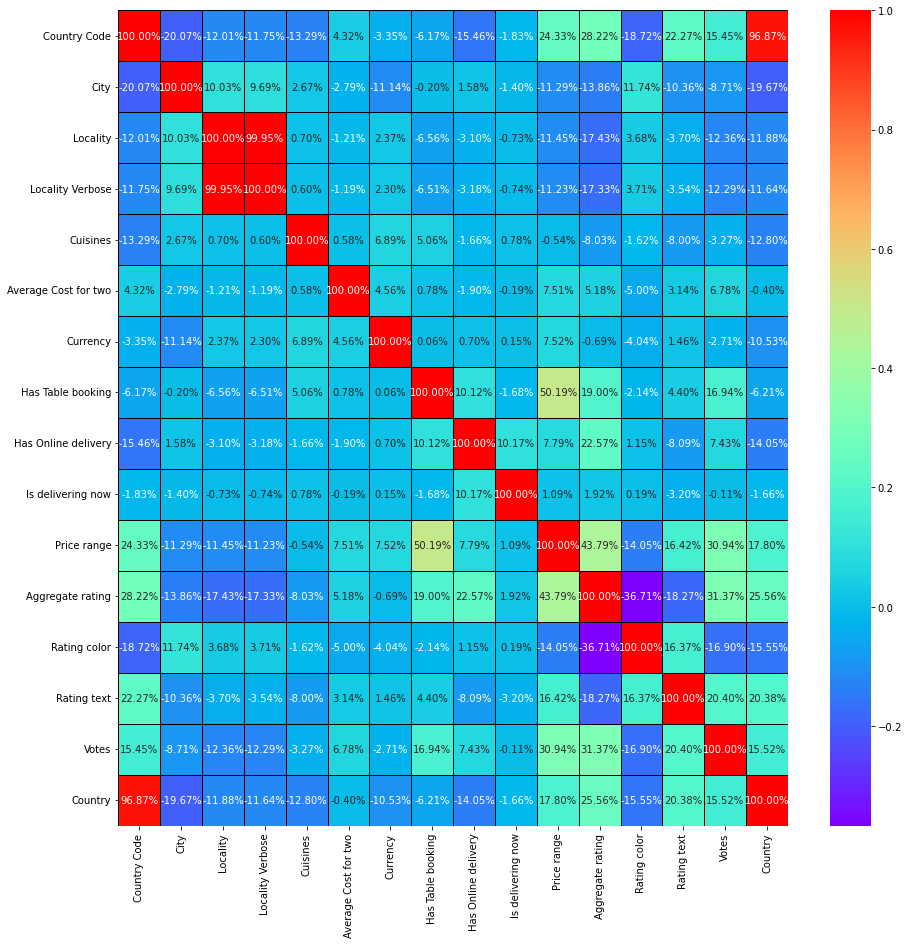

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2%',cmap='rainbow',linewidth=0.5,linecolor='black')
plt.show()

**Observation 1**<br>
Correlation with target variable Average cost for two<br>
Positive and highly correlated: Price Range, Aggregate Rating, Currency.<br>
Negative and Least Correlated :Country, Locality, Locality Verbose.<br>
    
**Observation 2**<br>
Correlation with target variable Price Range<br>
Positive and highly correlated: Country code, has table booking, Votes, Aggregate rating etc.<br>
Negative and Least Correlated : City, locality, rating color.<br>   

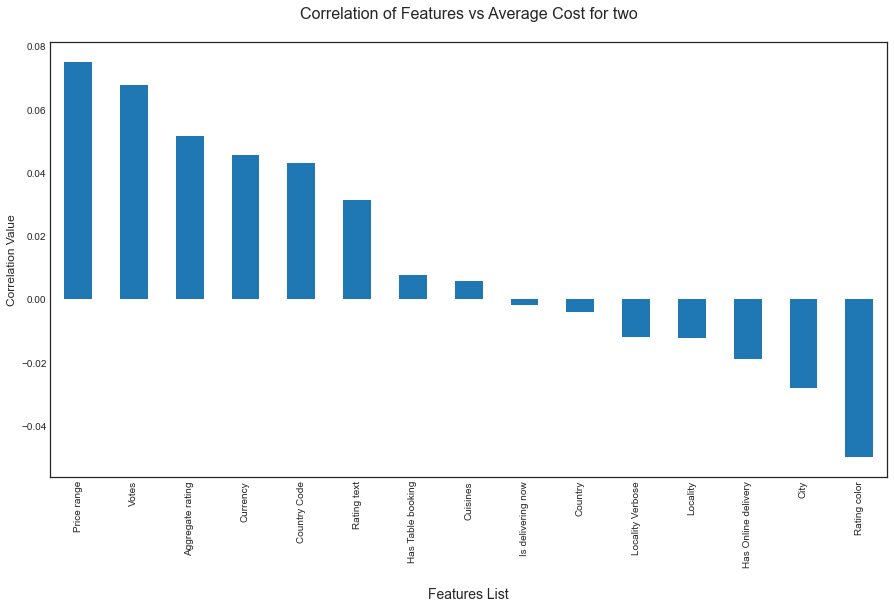

In [30]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['Average Cost for two'].sort_values(ascending=False).drop('Average Cost for two').plot.bar()
plt.title("Correlation of Features vs Average Cost for two\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Correlation of features wrt to Average cost for two can be seen above graph.<br>
Price range, rating color, votes are all highly correlated to avg cost price for two

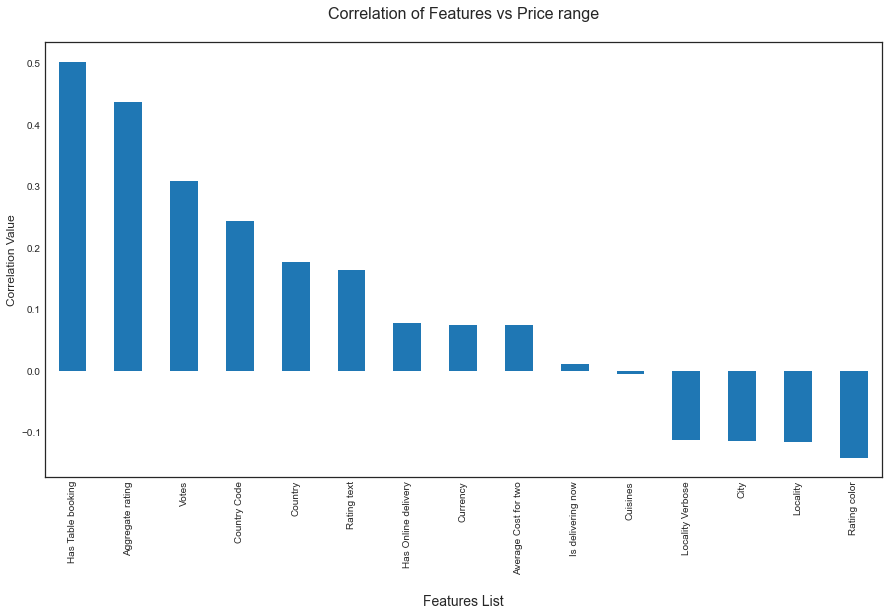

In [31]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['Price range'].sort_values(ascending=False).drop('Price range').plot.bar()
plt.title("Correlation of Features vs Price range\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Correlation of features wrt to Price range can be seen in above graph.<br>
Has table booking, Aggregate rating, Rating color are all highly correlated

In [32]:
df.describe()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,78.954141,658.128678,677.305204,989.461732,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,56.750546,23.464434,315.866877,331.727817,514.176108,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,77.000000,381.000000,387.000000,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,1.000000,89.000000,696.000000,707.000000,1127.000000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.000000,89.000000,921.000000,953.000000,1353.500000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,216.000000,140.000000,1207.000000,1264.000000,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


# Checkking Outliers

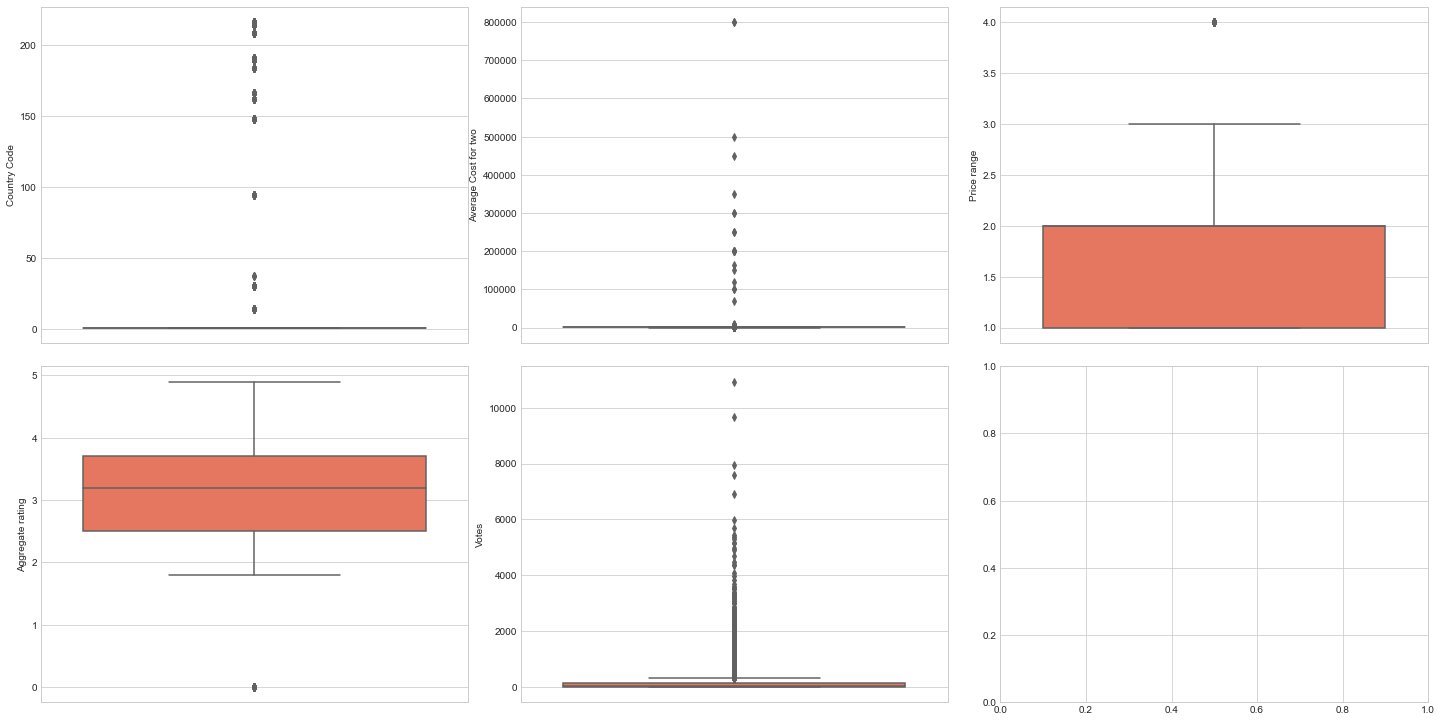

In [33]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index =0

ax=ax.flatten()

for col, value in df[num_d].items():
    sns.boxplot(y =col, data= df, ax = ax[index], palette= "Reds")
    index+=1
plt.tight_layout(pad=0.6, w_pad=0.2, h_pad=2.0)
plt.show()

Here I have used box plot only on numerical data as it is no use chceking outliers of encoded data.<br>
Outliers are present in every numerical column as seen above

**Removing Outliers**

In [34]:
z = np.array(abs(zscore(df)))
threshold = 4
print(np.where(z>4))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
        336,  350,  352,  458,  468,  591,  600,  726,  727,  728,  731,
        735,  736,  739,  743,  787,  821,  824, 1147, 1163, 1247, 1252,
       1253, 1258, 1343, 1345, 1356, 1403, 1411, 1464, 1470, 1534, 1554,
       1555, 1769, 1861, 1988, 2021, 2047, 2204, 2300, 2302, 2304, 2307,
       2311, 2406, 2410, 2411, 2412, 2413, 2414, 2480, 2483, 2485, 2488,
       2490, 2492, 2495, 2605, 2635, 2920, 3008, 3013, 3016, 3018, 3026,
       3028, 3041, 3049, 3055, 3056, 3060, 3083, 3085, 3093, 3095, 3101,
       3107, 3110, 3112, 3115, 3119, 3316, 3319, 3336, 3438, 3589, 3599,
       3601, 3982, 3986, 3992, 3993, 3994, 4087, 4178, 4203, 4206, 4515,
       4591, 4638, 4649, 4673, 4703, 5007, 5026, 5156, 5157, 5443, 5760,
       6144, 6303, 6317, 6443, 6498, 6607, 6701, 6712, 6848, 7033, 7087,
       7863, 8434, 8441, 8643, 8651, 8737, 8832, 9

In [35]:
df_new =df[(z<4).all(axis=1)]
df_new.shape

(9244, 16)

In [36]:
print("Old dataframe shape :",df.shape)
print("New dataframe shape :", df_new.shape)


Old dataframe shape : (9551, 16)
New dataframe shape : (9244, 16)


In [37]:
dataloss = ((9551-9244)/9551)*100
print("Percentage data loss is :", dataloss)

Percentage data loss is : 3.2143231075280077


I have changed the treshold value to 4 as in 3 the data loss was 11.27% which was not affordable. Now our data loss is 3.21% which is totally affordable

In [38]:
df =df_new.copy()            # uupdating our existing dataframe after removing outliers

In [39]:
df.shape      

(9244, 16)

# Checking Skewness

In [40]:
df.skew().sort_values() 

City                   -1.270447
Currency               -1.048900
Aggregate rating       -0.932594
Cuisines               -0.312537
Locality               -0.272025
Locality Verbose       -0.200943
Is delivering now       0.000000
Rating color            0.047666
Rating text             0.431526
Price range             0.946852
Has Online delivery     1.106348
Has Table booking       2.337983
Country Code            3.460894
Average Cost for two    3.565180
Country                 3.577560
Votes                   3.749035
dtype: float64

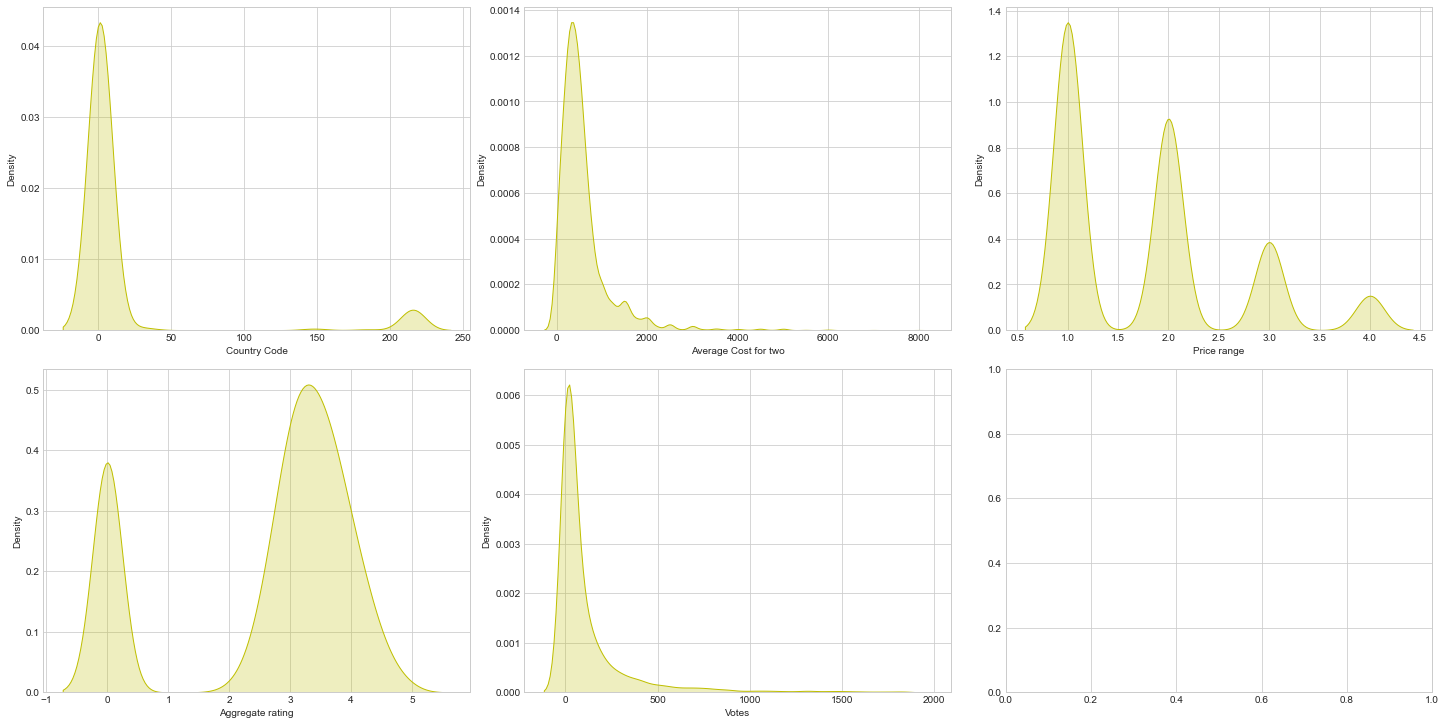

In [41]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df[num_d].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We observe skewness in numerical columns('Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes')

# 1. Predicting the Classification Target Variable


# Splitting the Dataframe into Classification Target variable and Feature Variables

In [42]:
x= df.drop('Price range', axis=1)
y=df['Price range']

# Removing Skewness

In [43]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,3.453044,-2.141668,-1.926011,-1.935976,-0.231744,-1.700802,-3.976321,-0.369411,-0.589676,0.0,0.115581,-0.641125,-1.148577,-0.662919,-3.879751
1,3.453044,-2.141668,-1.926011,-1.935976,-1.279394,-2.056056,-3.976321,-0.369411,-0.589676,0.0,0.838544,1.322875,0.402905,-0.486750,-3.879751
2,3.453044,-2.141668,-1.926011,-1.935976,-1.616273,-1.824806,-3.976321,-0.369411,-0.589676,0.0,0.742842,1.322875,0.402905,-0.396238,-3.879751
3,3.453044,-2.141668,-1.926011,-1.935976,-1.438639,-1.644973,-3.976321,-0.369411,-0.589676,0.0,0.838544,1.322875,0.402905,-0.396238,-3.879751
4,3.453044,-2.141668,-1.922539,-1.932298,1.193962,-1.760515,-3.976321,-0.369411,-0.589676,0.0,0.287095,-0.641125,-1.148577,-0.396238,-3.879751


# Scaling the Data

In [45]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,3.453044,-2.141668,-1.926011,-1.935976,-0.231744,-1.700802,-3.976321,-0.369411,-0.589676,0.0,0.115581,-0.641125,-1.148577,-0.662919,-3.879751
1,3.453044,-2.141668,-1.926011,-1.935976,-1.279394,-2.056056,-3.976321,-0.369411,-0.589676,0.0,0.838544,1.322875,0.402905,-0.486750,-3.879751
2,3.453044,-2.141668,-1.926011,-1.935976,-1.616273,-1.824806,-3.976321,-0.369411,-0.589676,0.0,0.742842,1.322875,0.402905,-0.396238,-3.879751
3,3.453044,-2.141668,-1.926011,-1.935976,-1.438639,-1.644973,-3.976321,-0.369411,-0.589676,0.0,0.838544,1.322875,0.402905,-0.396238,-3.879751
4,3.453044,-2.141668,-1.922539,-1.932298,1.193962,-1.760515,-3.976321,-0.369411,-0.589676,0.0,0.287095,-0.641125,-1.148577,-0.396238,-3.879751


# Principle Component Analysis

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,2.317256,2.286155,-2.021261,-1.817154,1.202404,-0.313371,2.239585,5.031910,0.078133,0.381106,2.876952,-1.460665,0.140354,0.008804,-1.934910e-16
1,2.373318,2.806667,-2.456142,0.392503,1.545298,-1.176715,2.213936,4.798130,0.906739,-0.266700,3.224965,-1.055457,-0.481173,0.009946,-1.271611e-16
2,2.394410,2.714583,-2.438398,0.522262,1.610574,-1.361318,2.456056,4.702413,0.860337,-0.272337,3.101088,-1.188220,-0.350944,0.010288,-9.772147e-17
3,2.415330,2.574041,-2.428027,0.516561,1.572240,-1.235006,2.376633,4.755922,0.920853,-0.287629,3.031082,-1.294458,-0.428687,0.010372,-5.954066e-17
4,2.383405,2.058477,-2.018579,-2.084547,0.921086,0.562892,1.308166,5.447799,0.410016,0.343720,2.940208,-1.389066,0.170223,0.008217,-7.039574e-17


# Checking Multicollinearity

In [49]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Country Code,1.0
1,City,1.0
2,Locality,1.0
3,Locality Verbose,1.0
4,Cuisines,1.0
5,Average Cost for two,1.0
6,Currency,1.0
7,Has Table booking,1.0
8,Has Online delivery,1.0
9,Is delivering now,1.0


After PCA and Scaling the data our multicollinearity observed in correlation plot is removed.

# Balancing the Data using SMOTE

<AxesSubplot:xlabel='Price range', ylabel='count'>

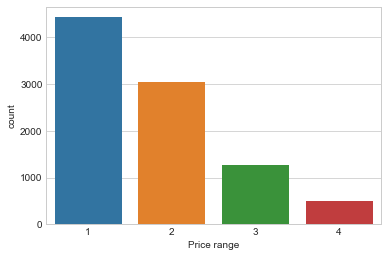

In [50]:
sns.countplot(y)

Thus above plot shows we have imbalnced data

In [51]:
sm = SMOTE()
x,y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='Price range', ylabel='count'>

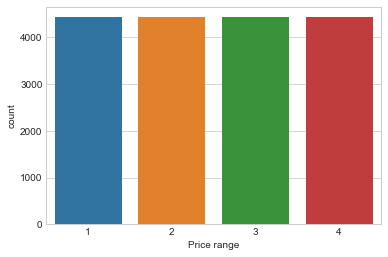

In [52]:
sns.countplot(y)

After using SMOTE data is now balanced

# Finding Best Random state for Classification Models

In [53]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 94.72259810554804 on Random State 469


In [ ]:
Best accuracy is at Random state : 469

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=469)

# Feature Importance

,Importance
Features,
Rating color,0.205
City,0.168
Aggregate rating,0.156
Locality Verbose,0.064
Average Cost for two,0.063
Country Code,0.062
Is delivering now,0.059
Has Online delivery,0.053
Currency,0.050


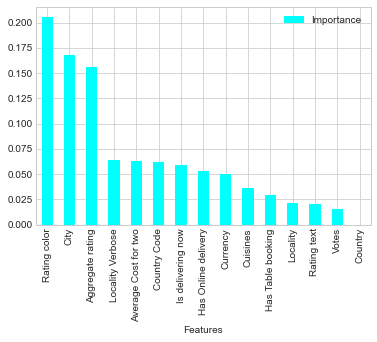

In [55]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

# Training the Classification Models

In [59]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()


model=[lg,gnb,dtc,knn,rfc,svc,etc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    print('-------------------------------------------------------------------------------')

LogisticRegression()
Accuracy Score of LogisticRegression() is: 94.72259810554804
Cross Validation Score are : [0.89857932 0.91278611 0.94475138 0.94435675 0.93054459 0.9435452
 0.93722858]
Cross Validation Score: 94.47513812154696
Accuracy Score - CV_Score 0.2474599840010825
[[1089   13    0    0]
 [  13 1033   44    0]
 [   0   37 1052   71]
 [   0    0   56 1026]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1102
           2       0.95      0.95      0.95      1090
           3       0.91      0.91      0.91      1160
           4       0.94      0.95      0.94      1082

    accuracy                           0.95      4434
   macro avg       0.95      0.95      0.95      4434
weighted avg       0.95      0.95      0.95      4434



-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 70.41046459179071
Cross Validation Score are : [0.5347277  0.6886

In [60]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC'],
                                 "Accuracy_score":[94.72,70.41,94.22,90.57,98.30,92.98,98.35],
                                 "Cv Score":[94.47,70.07,97.27,92.93,98.97,93.80,98.89],
                                 "Result":[0.24,0.33,-3.07,-2.36,-0.66,-0.81,-0.54],
                                 })

Performance_table

,Model,Accuracy_score,Cv Score,Result
0,LR,94.72,94.47,0.24
1,GNB,70.41,70.07,0.33
2,DTC,94.22,97.27,-3.07
3,KNC,90.57,92.93,-2.36
4,RFC,98.30,98.97,-0.66
5,SVC,92.98,93.80,-0.81
6,ETC,98.35,98.89,-0.54


Out of above 7 models extra trees classifier is giving best results.

# HyperTuning

In [61]:
# choosing Extra trees classifier

param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

In [62]:
GCV = GridSearchCV(ExtraTreesClassifier(), param, cv=7)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [64]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'n_estimators': 500,
 'n_jobs': -2,
 'random_state': 1000}

In [65]:
GCV.best_score_

0.9772216047746932

# Final Classification Model

In [66]:
final_model = ExtraTreesClassifier(criterion= 'entropy',max_depth =40,n_estimators=500, n_jobs=-2, random_state=1000)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 98.46639603067207


Our classification model is performing with 98% accuracy

# Confusion Matrix

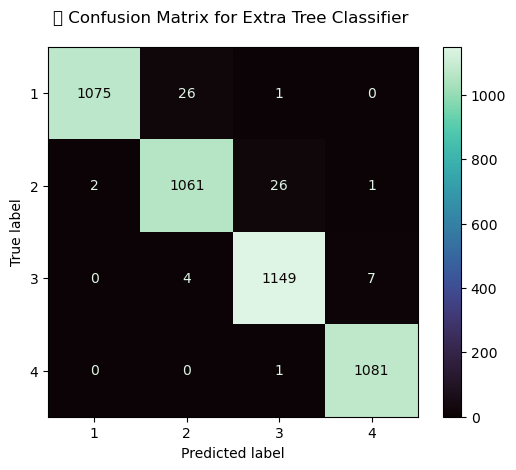

In [68]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()


Black box tells how many times our model failed to predict the Price Range, other boxes tells how many times model has predicted correct values

# Saving the Classification model

In [69]:
filename = "ZomatoClassification_E10.pkl"
joblib.dump(final_model, filename)

['ZomatoClassification_E10.pkl']

# 2. Predicting the Regression Target Variable

# Splitting the dataframe in Regression target variable and Feature Variables

In [70]:
x= df.drop('Average Cost for two', axis=1)
y=df['Average Cost for two']

In [71]:
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
22,30,21.0,67.0,67.0,852.0,1.0,0.0,0.0,0.0,2,3.0,2.0,0.0,6,1.0
23,30,21.0,67.0,67.0,331.0,1.0,0.0,0.0,0.0,1,3.8,5.0,2.0,9,1.0
24,30,21.0,67.0,67.0,177.0,1.0,0.0,0.0,0.0,2,3.7,5.0,2.0,11,1.0
25,30,21.0,67.0,67.0,257.0,1.0,0.0,0.0,0.0,3,3.8,5.0,2.0,11,1.0
26,30,21.0,68.0,68.0,1618.0,1.0,0.0,0.0,0.0,2,3.2,2.0,0.0,11,1.0


# Removing Skewness

In [72]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3.453044,-2.141668,-1.926011,-1.935976,-0.231744,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.115581,-0.641125,-1.148577,-0.662919,-3.879751
1,3.453044,-2.141668,-1.926011,-1.935976,-1.279394,-3.976321,-0.369411,-0.589676,0.0,-0.993847,0.838544,1.322875,0.402905,-0.486750,-3.879751
2,3.453044,-2.141668,-1.926011,-1.935976,-1.616273,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.742842,1.322875,0.402905,-0.396238,-3.879751
3,3.453044,-2.141668,-1.926011,-1.935976,-1.438639,-3.976321,-0.369411,-0.589676,0.0,1.330645,0.838544,1.322875,0.402905,-0.396238,-3.879751
4,3.453044,-2.141668,-1.922539,-1.932298,1.193962,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.287095,-0.641125,-1.148577,-0.396238,-3.879751


In [73]:
x.skew().sort_values()

Country               -1.448363
Aggregate rating      -0.619597
Cuisines              -0.385364
Locality              -0.307669
Locality Verbose      -0.282450
City                  -0.213954
Rating color          -0.098671
Rating text           -0.055279
Votes                 -0.011609
Is delivering now      0.000000
Price range            0.204414
Currency               0.985679
Has Online delivery    1.106348
Has Table booking      2.337983
Country Code           3.164769
dtype: float64

Ignore the encoded features columns, we have managed to remove all skewness

# Scaling the Data

In [75]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3.453044,-2.141668,-1.926011,-1.935976,-0.231744,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.115581,-0.641125,-1.148577,-0.662919,-3.879751
1,3.453044,-2.141668,-1.926011,-1.935976,-1.279394,-3.976321,-0.369411,-0.589676,0.0,-0.993847,0.838544,1.322875,0.402905,-0.486750,-3.879751
2,3.453044,-2.141668,-1.926011,-1.935976,-1.616273,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.742842,1.322875,0.402905,-0.396238,-3.879751
3,3.453044,-2.141668,-1.926011,-1.935976,-1.438639,-3.976321,-0.369411,-0.589676,0.0,1.330645,0.838544,1.322875,0.402905,-0.396238,-3.879751
4,3.453044,-2.141668,-1.922539,-1.932298,1.193962,-3.976321,-0.369411,-0.589676,0.0,0.611670,0.287095,-0.641125,-1.148577,-0.396238,-3.879751


# Principle Component Analysis(PCA)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,Country Code,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,1.966360,2.701782,-0.623085,-1.417478,-0.789994,0.655100,2.659032,5.064021,0.146298,0.618962,1.605534,2.753082,0.181731,0.008525,-1.957575e-16
1,1.466242,3.728288,-0.308947,0.103667,-1.765804,-0.537246,2.446910,4.789181,0.913001,-0.446671,0.217064,3.330669,-0.363858,0.009283,-1.290323e-16
2,2.058969,3.371733,-0.264182,0.667456,-1.711011,-0.453263,2.900595,4.726509,0.910658,-0.143566,1.380714,2.839412,-0.308182,0.010187,-9.882387e-17
3,2.346119,3.154695,-0.299866,0.878876,-1.561679,-0.244597,2.902032,4.793303,0.988415,-0.028100,1.877126,2.653289,-0.414742,0.010453,-5.893468e-17
4,2.069278,2.449342,-0.871399,-1.512465,-0.253943,1.395536,1.738568,5.477751,0.470979,0.539108,1.475823,2.819975,0.214600,0.007988,9.768621e-18


# Checking Multicollinearity

In [78]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Country Code,1.0
1,City,1.0
2,Locality,1.0
3,Locality Verbose,1.0
4,Cuisines,1.0
5,Currency,1.0
6,Has Table booking,1.0
7,Has Online delivery,1.0
8,Is delivering now,1.0
9,Price range,1.0


After PCA and Scaling the data our multicollinearity observed in correlation plot is removed

# Finding Best Random State For Regression Models

In [79]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.7082665983154429 on Random State 96


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=96)

# Feature Importance

,Importance
Features,
Locality Verbose,0.344
Rating color,0.166
Aggregate rating,0.109
City,0.066
Is delivering now,0.060
Locality,0.057
Has Table booking,0.046
Country Code,0.033
Price range,0.028


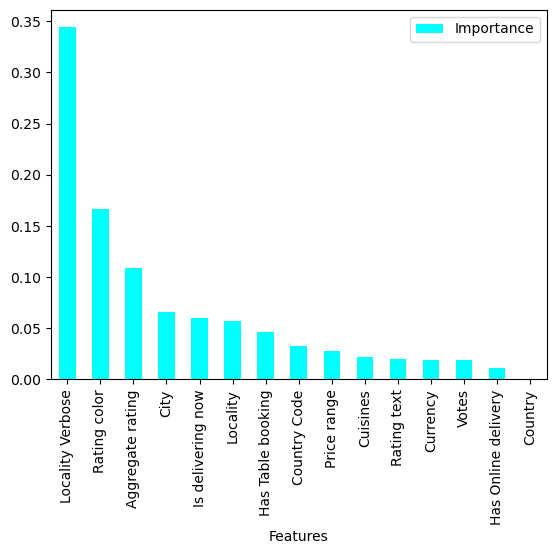

In [81]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

Locality Verbose is most important feature whereas country is least important.

# Training Regression Models



****************** LinearRegression() *******************


The training accuracy of is 0.6172305570953496
The test accuracy of is 0.7082665983154429
R2 Score is: 70.82665983154429
Cross Validation Scores [-6.88551295e+27  6.66414034e-01  6.93075055e-01  5.70523073e-01
  7.00175054e-01  5.02307541e-01  4.98720578e-01]
Maximum of cvs: 0.7001750541173114
Cross Validation Score: 70.01750541173114
R2 Score - Cross Validation Score is 0.8091544198131544
Error Calculations:
Mean absolute error : 178.3697765476171
Mean squared error :  83274.95646872587
Root mean squared error: 288.57400518536986


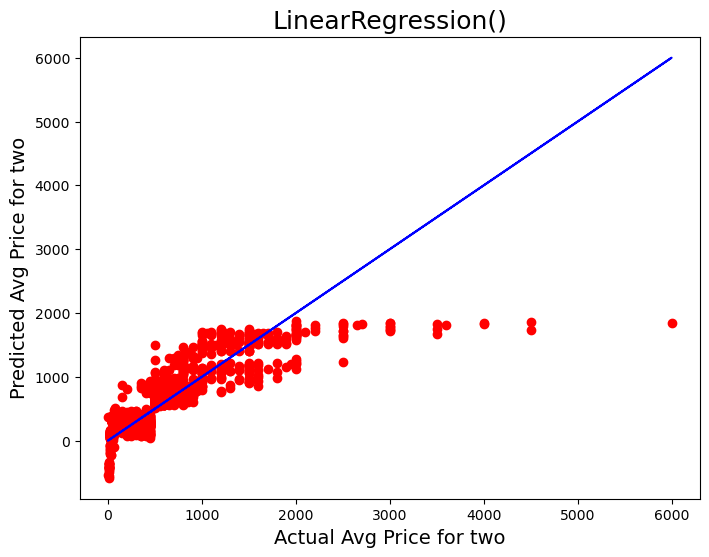



****************** SVR() *******************


The training accuracy of is 0.28368668600938207
The test accuracy of is 0.3298704537612642
R2 Score is: 32.987045376126424
Cross Validation Scores [0.00745122 0.16152536 0.24513491 0.32864507 0.4798891  0.16060342
 0.39240613]
Maximum of cvs: 0.47988910223053927
Cross Validation Score: 47.98891022305393
R2 Score - Cross Validation Score is -15.001864846927504
Error Calculations:
Mean absolute error : 224.15283206968098
Mean squared error :  191287.6909849976
Root mean squared error: 437.36448299444436


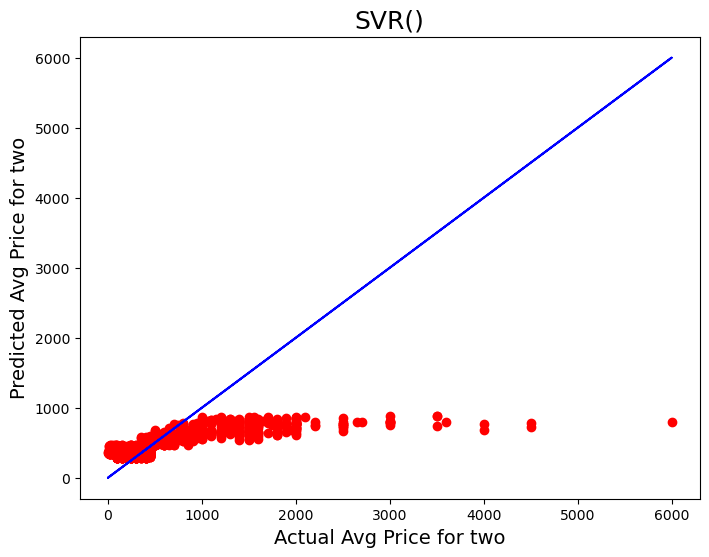



****************** DecisionTreeRegressor() *******************


The training accuracy of is 0.9994560574195426
The test accuracy of is 0.6042923911485032
R2 Score is: 60.42923911485032
Cross Validation Scores [-0.72465787  0.56413169  0.03886348  0.66979275  0.73790006  0.67366965
 -1.19581846]
Maximum of cvs: 0.7379000613387214
Cross Validation Score: 73.79000613387214
R2 Score - Cross Validation Score is -13.360767019021822
Error Calculations:
Mean absolute error : 160.11426382343097
Mean squared error :  112954.27164381617
Root mean squared error: 336.08670256916764


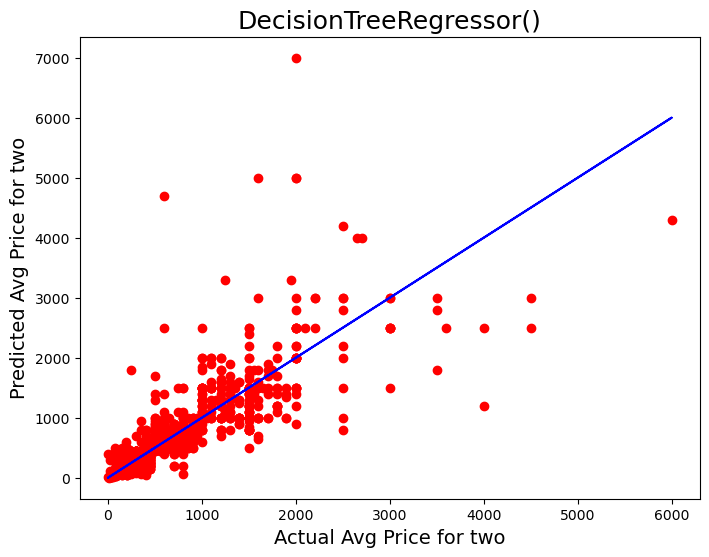



****************** KNeighborsRegressor() *******************


The training accuracy of is 0.8194992820469568
The test accuracy of is 0.7481798481712487
R2 Score is: 74.81798481712487
Cross Validation Scores [-0.71872807  0.53802937  0.71002705  0.59387254  0.70617664  0.50926369
 -0.09883131]
Maximum of cvs: 0.7100270498523895
Cross Validation Score: 71.00270498523895
R2 Score - Cross Validation Score is 3.815279831885917
Error Calculations:
Mean absolute error : 143.18074634937804
Mean squared error :  71881.7662303948
Root mean squared error: 268.10775115687125


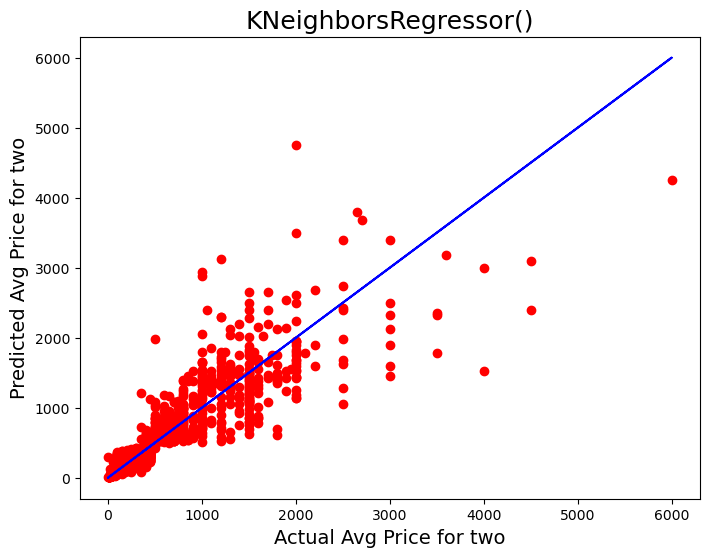



****************** Ridge(alpha=0.01, normalize=True) *******************


The training accuracy of is 0.6173358845781427
The test accuracy of is 0.7084276272772911
R2 Score is: 70.84276272772911
Cross Validation Scores [-33.24252575   0.66677856   0.69282901   0.57095089   0.70275007
   0.4996451    0.63643229]
Maximum of cvs: 0.7027500682802732
Cross Validation Score: 70.27500682802732
R2 Score - Cross Validation Score is 0.567755899701794
Error Calculations:
Mean absolute error : 177.6411030111483
Mean squared error :  83228.99094091628
Root mean squared error: 288.49435166206683


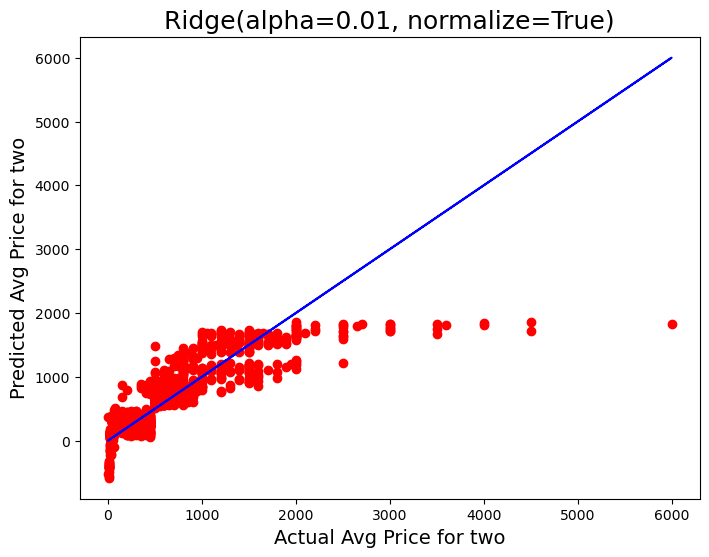



****************** Lasso(alpha=0.01, max_iter=100, normalize=True) *******************


The training accuracy of is 0.6173637040595428
The test accuracy of is 0.7085011668639603
R2 Score is: 70.85011668639602
Cross Validation Scores [-24.63619141   0.66666341   0.69298483   0.57101745   0.70181996
   0.50041963   0.64548289]
Maximum of cvs: 0.7018199624258408
Cross Validation Score: 70.18199624258408
R2 Score - Cross Validation Score is 0.6681204438119437
Error Calculations:
Mean absolute error : 177.86152918419123
Mean squared error :  83207.99915237495
Root mean squared error: 288.4579677394524


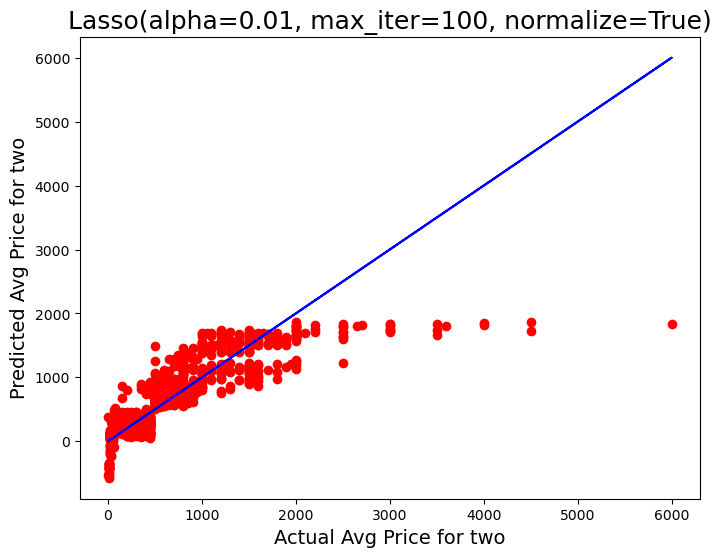



****************** RandomForestRegressor() *******************


The training accuracy of is 0.9736160465531318
The test accuracy of is 0.8372680912489364
R2 Score is: 83.72680912489365
Cross Validation Scores [-1.50122131  0.79415866  0.82266131  0.76144547  0.84057333  0.67967179
  0.24017338]
Maximum of cvs: 0.8405733279658063
Cross Validation Score: 84.05733279658062
R2 Score - Cross Validation Score is -0.3305236716869757
Error Calculations:
Mean absolute error : 119.08783799271947
Mean squared error :  46451.63200054249
Root mean squared error: 215.52640673602502


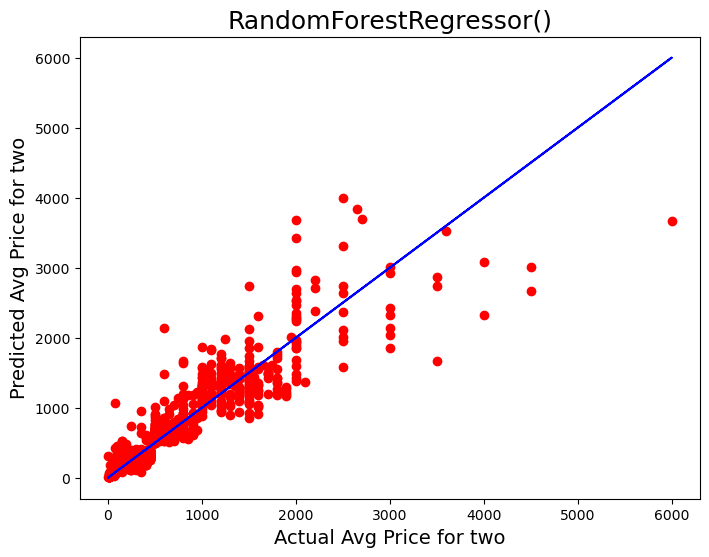



****************** GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200) *******************


The training accuracy of is 0.7988505512506021
The test accuracy of is 0.6608841298128998
R2 Score is: 66.08841298128998
Cross Validation Scores [-2.21952981  0.59156728  0.74105593  0.64290938  0.62561223  0.6988791
 -0.23930344]
Maximum of cvs: 0.7410559265868126
Cross Validation Score: 74.10559265868126
R2 Score - Cross Validation Score is -8.017179677391283
Error Calculations:
Mean absolute error : 204.97568605323653
Mean squared error :  96800.22638689757
Root mean squared error: 311.1273475393919


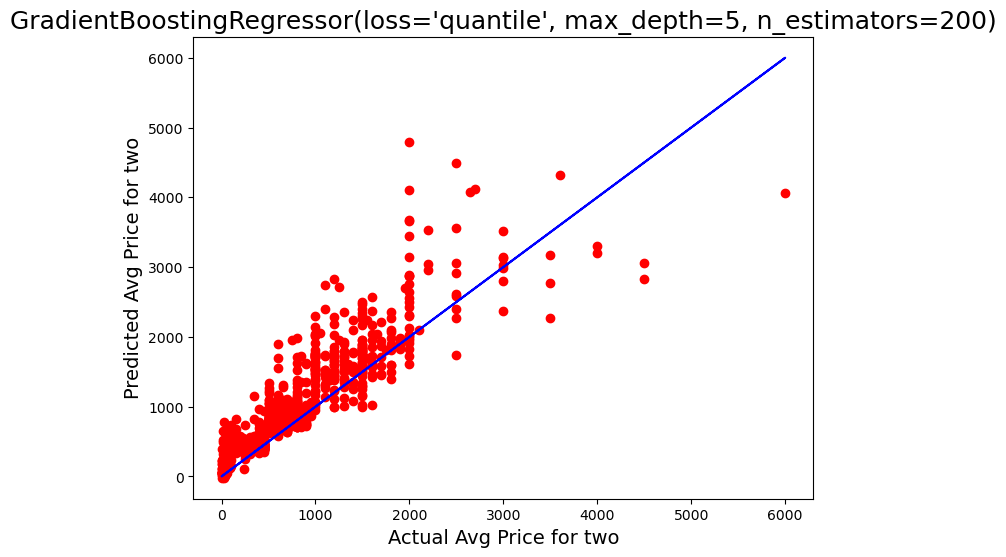



****************** AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42) *******************


The training accuracy of is -1.3093034387498848
The test accuracy of is -1.8441932614788703
R2 Score is: -184.41932614788703
Cross Validation Scores [-5.48607588 -1.04338563 -0.5258784  -0.57888672 -3.38991375  0.480922
 -4.14777656]
Maximum of cvs: 0.48092200263772567
Cross Validation Score: 48.09220026377257
R2 Score - Cross Validation Score is -232.5115264116596
Error Calculations:
Mean absolute error : 854.027086874477
Mean squared error :  811871.622072249
Root mean squared error: 901.0391900867847


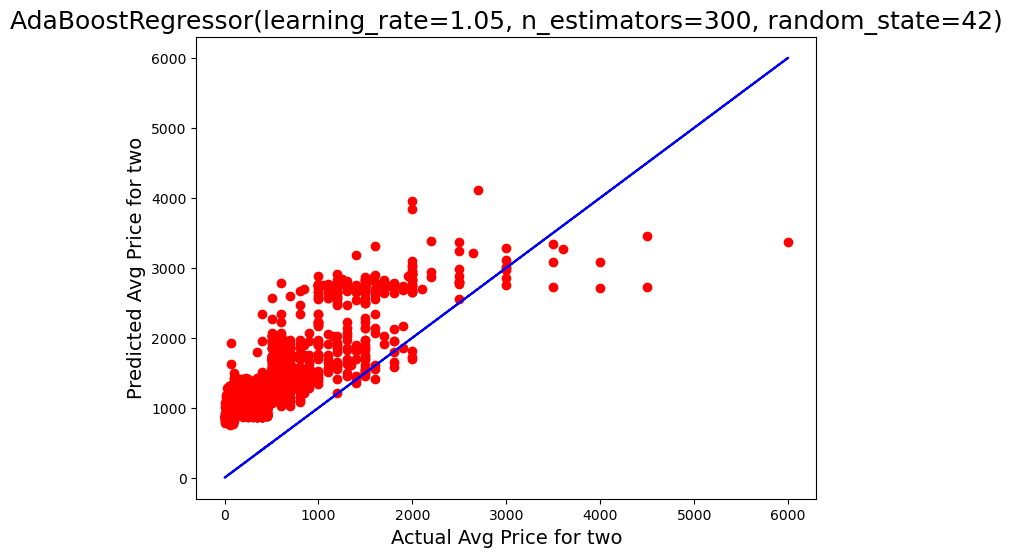



****************** ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6) *******************


The training accuracy of is 0.9994526800048693
The test accuracy of is 0.8516465652260055
R2 Score is: 85.16465652260055
Cross Validation Scores [-0.23967999  0.77949412  0.79728545  0.72261787  0.82071057  0.62531315
  0.51359286]
Maximum of cvs: 0.8207105661484821
Cross Validation Score: 82.07105661484822
R2 Score - Cross Validation Score is 3.093599907752335
Error Calculations:
Mean absolute error : 118.70134525741071
Mean squared error :  42347.31351108199
Root mean squared error: 205.78462894755282


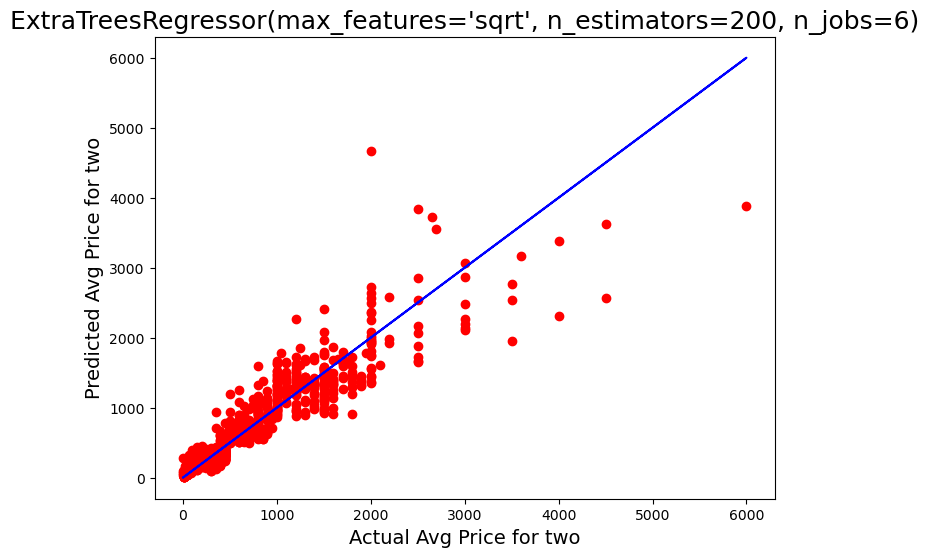

In [82]:
lg  = LinearRegression()
svr = SVR(kernel='rbf')
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
ridr= Ridge(alpha=1e-2, normalize=True)
las = Lasso(alpha=1e-2, normalize=True, max_iter=100)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
etr = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)


model=[lg,svr,dtr,knr,ridr,las,rfr,gbr,abr,etr]

for m in model:
    print('\n')
    print('******************',m,'*******************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # calculating scores
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    r2 = r2_score(y_test, pred_test)*100
    
    #Calculating cross validation score
   
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
        
    a = max(cvs)
    cv_score=(a.mean())*100    # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that r2 score of all models to be approx 100 %

    
    # final result comparing r2 and cross validation
    result = r2 - cv_score
    
    
    print('The training accuracy of is', train_score)
    print('The test accuracy of is', test_score)
    print("R2 Score is:", r2)
    print("Cross Validation Scores",cvs)
    print("Maximum of cvs:" , a)
    print("Cross Validation Score:", cv_score)
    print("R2 Score - Cross Validation Score is", result)
    print("Error Calculations:")
    print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
    print("Mean squared error : ",mean_squared_error(y_test, pred_test))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))
    
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual Avg Price for two',fontsize=14)
    plt.ylabel('Predicted Avg Price for two',fontsize=14)
    plt.title(m,fontsize=18)
    plt.show()

In [84]:
# performance table

Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','KNR','ridge','lasso','RFR','GBR','ABR','ETR'],                    
            'R2 Score': [70.82,32.98,60.42,74.81,70.84,70.85,83.72,66.08,-184.41,85.16],
            'CV Score': [70.01,47.98,73.79,71.00,70.27,70.18,84.05,74.10,48.09,82.07],
            'Result' :[0.80,-15.00,-13.36,3.81,0.56,0.66,-0.33,-8.01,-232.51,3.09],
           'RMSE':[288.57,437.36,336.08,268.10,288.49,288.45,215.52,311.12,901.03,205.78]})

Performance_table

,Model,R2 Score,CV Score,Result,RMSE
0,LR,70.82,70.01,0.80,288.57
1,SVR,32.98,47.98,-15.00,437.36
2,DTR,60.42,73.79,-13.36,336.08
3,KNR,74.81,71.00,3.81,268.10
4,ridge,70.84,70.27,0.56,288.49
5,lasso,70.85,70.18,0.66,288.45
6,RFR,83.72,84.05,-0.33,215.52
7,GBR,66.08,74.10,-8.01,311.12
8,ABR,-184.41,48.09,-232.51,901.03
9,ETR,85.16,82.07,3.09,205.78


From above table we see RFR gives best results. So I chose Random Forest Regressor

# Hypertuning

In [91]:
# chossing RandomForestRegressor()
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [92]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [94]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto'}

In [95]:
GCV.best_score_

0.7853320584531485

In [97]:
final_model=RandomForestRegressor(criterion='mse', max_depth= 9, max_features= 'auto')
final_model.fit(x_train,y_train)
pred_final=final_model.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)


R2 Score 81.01517996183499


Our model is performing with 81% accuracy

# Saving The Regression Model

In [98]:
filename = "ZomatoRegression_E08.pkl"
joblib.dump(Final_Model, filename)

['ZomatoRegression_E08.pkl']

# Thanks For evaluating